# 1. 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

pd.set_option('max.columns', 1000)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

from scipy import stats
import statsmodels.api as sm

# 2. 데이터 불러오기

In [2]:
# 데이터 확인
raw_data = pd.read_csv('data/train_mdf.csv')

print('Shape of Data :', raw_data.shape, '\n')
print('-' * 50)
print(raw_data.info())

Shape of Data : (1460, 81) 

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1

# 3. 결측치 처리

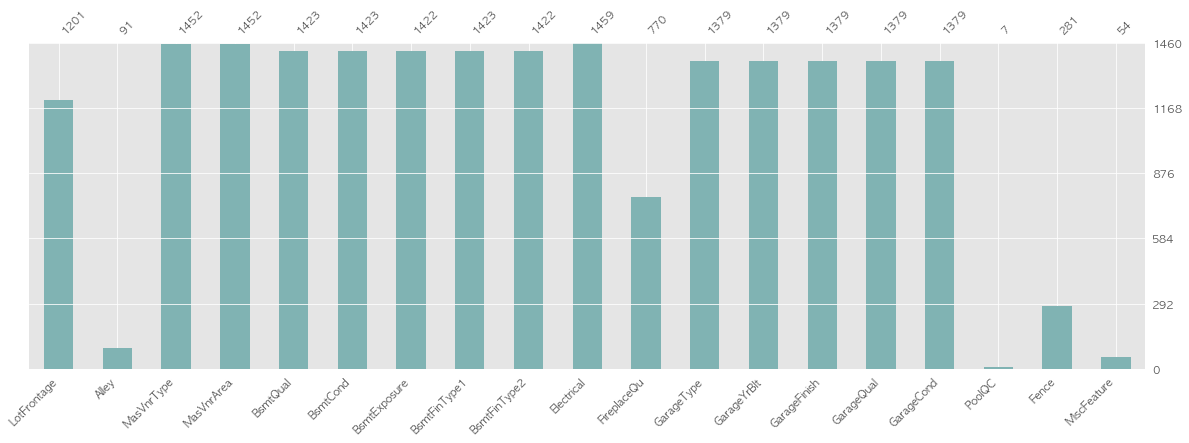

In [3]:
# 결측치를 포함하고 있는 features 추출
null_data = pd.DataFrame(raw_data.isnull().sum(), columns = ['Count'])
null_list = null_data[null_data['Count'] > 0].index

# 추출 후 시각화
msno.bar(raw_data[null_list], color = (0.5, 0.7, 0.7), fontsize = 11, figsize = (20, 6))
plt.yticks([])
plt.show()

- 앞선 분석과정에서 아래의 변수들의 결측치를 **No have**로 변경하는 이유를 설명했기 때문에 생략하도록 한다.

In [4]:
object_list = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
               'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
               'PoolQC', 'Fence', 'MiscFeature']

# 원래 데이터를 보존하기 위해 새로운 DataFrame 생성
modify_data = raw_data.copy()

# 결측치를 의미하지 않는 값에 'No have' 채워넣기
for feature in object_list:
    null_data = modify_data[feature].isnull().sum()
    print('Number of null values of {} *Before Modify* :'.format(feature), null_data, '\n')
    
    modify_data.loc[modify_data[feature].isnull(), feature] = 'No have'
    
    null_data = modify_data[feature].isnull().sum()
    print('Number of null values of {} *After Modify* :'.format(feature), null_data)
    print('-' * 60)

Number of null values of Alley *Before Modify* : 1369 

Number of null values of Alley *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtQual *Before Modify* : 37 

Number of null values of BsmtQual *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtCond *Before Modify* : 37 

Number of null values of BsmtCond *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtExposure *Before Modify* : 38 

Number of null values of BsmtExposure *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtFinType1 *Before Modify* : 37 

Number of null values of BsmtFinType1 *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtFinType2 *Before Modify* : 38 

Number of null values of BsmtFinType2 *After Modify* : 0
---------------

In [5]:
print('Number of null values of GarageYrBlt *Before Modify* :', modify_data['GarageYrBlt'].isnull().sum(), '\n')

# 결측치 대체
modify_data.loc[modify_data['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 9999
print('Number of null values of GarageYrBlt *After Modify* :', modify_data['GarageYrBlt'].isnull().sum())

Number of null values of GarageYrBlt *Before Modify* : 81 

Number of null values of GarageYrBlt *After Modify* : 0


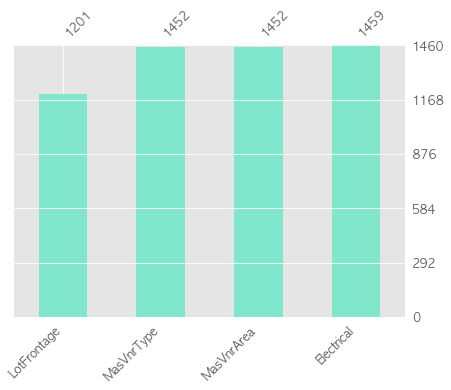

In [6]:
# 변경해준 뒤 결측치 확인
null_data = pd.DataFrame(modify_data.isnull().sum(), columns = ['Count'])
null_list = null_data[null_data['Count'] > 0].index

# 추출 후 시각화
msno.bar(modify_data[null_list], color = (0.5, 0.9, 0.8), fontsize = 12, figsize = (7, 5))
plt.yticks([])
plt.show()

- **MasVnrType**의 값이 결측치일 때, **MasVnrArea**의 값 역시 결측치임을 확인할 수 있다.


- 결측치의 개수가 8개 뿐이므로 **MasVnrType** 변수에는 **'None'** 의 값을, **MasVnrArea** 변수에는 **'0'** 의 값을 넣어주자.


- **Electrical** 변수의 경우 1개의 결측치가 있으며, 최빈값으로 대체해주도록 하자.

In [7]:
print('Number of null values of MasVnrType *Before* :', modify_data['MasVnrType'].isnull().sum(), '\n')
print('Number of null values of MasVnrArea *Before* :', modify_data['MasVnrArea'].isnull().sum(), '\n')
print('Number of null values of Electrical *Before* :', modify_data['Electrical'].isnull().sum(), '\n')

modify_data['MasVnrType'].fillna('None', inplace = True)
modify_data['MasVnrArea'].fillna(0, inplace = True)
modify_data['Electrical'].fillna(modify_data['Electrical'].mode()[0], inplace = True)

print('Number of null values of MasVnrType *After* :', modify_data['MasVnrType'].isnull().sum(), '\n')
print('Number of null values of MasVnrArea *After* :', modify_data['MasVnrArea'].isnull().sum(), '\n')
print('Number of null values of Electrical *After* :', modify_data['Electrical'].isnull().sum())

Number of null values of MasVnrType *Before* : 8 

Number of null values of MasVnrArea *Before* : 8 

Number of null values of Electrical *Before* : 1 

Number of null values of MasVnrType *After* : 0 

Number of null values of MasVnrArea *After* : 0 

Number of null values of Electrical *After* : 0


- **3. Missing Value.ipynb**에서 **로그를 취한 LotArea** 변수가 **LotFrontage** 변수에 가장 중요한 변수임을 확인하였다.


- 따라서, **LotFrontage** 변수의 결측치를 **LotArea** 변수를 로그화한 후, **KNN** 모델을 사용하여 결측치를 대체해주도록 하자.

In [8]:
# 'LotFrontage' 결측치를 대체해주는 함수 만들기
def imputer_lotfrontage(raw_data):
    
    print('Number of null values of LotFrontage *Before Modify* :', raw_data['LotFrontage'].isnull().sum(), '\n')
    
    # 'KNNImputer' 라이브러리 불러오기
    from sklearn.impute import KNNImputer
    
    # 'LotFrontage' 변수에 결측치를 가지는 'Id' 추출 후 저장
    miss_id = raw_data[raw_data['LotFrontage'].isnull()]['Id'].unique()
    
    # 'Id', 'LotFrontage', 'LotArea' 변수 추출 후 저장
    data = raw_data[['Id', 'LotFrontage', 'LotArea']]
    
    # 'LotFrontage' 변수의 값이 300 넘는 관측치를 삭제하기로 했으므로 삭제
    outlier_id = data[data['LotFrontage'] > 300]['Id']
    data = data[~data['Id'].isin(outlier_id)]
    
    # 'Id' 변수를 인덱스로 지정
    data = data.set_index('Id')
    
    # 'LotArea' 변수를 로그화 수행 후, 변수 삭제
    data['LotLogArea'] = data['LotArea'].apply(lambda x: np.log(x))
    data = data.drop('LotArea', axis = 1)
    
    # 모델 객체 생성 후 학습시키고 DataFrame으로 저장
    # 원본 데이터에 결측치로 기입되어 있는 관측치들만 수정해주기 위해 DataFrame을 만들 때, 인덱스를 위 데이터의 인덱스로 지정
    imputer = KNNImputer(n_neighbors = 5)
    pre_data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns, index = data.index)
    
    # 결측치가 존재하던 관측치만 저장
    pre_data = pre_data[pre_data.index.isin(miss_id)]
    
    # 원본 데이터 결측치를 대입해주는 과정
    for id_value, lot_value in zip(pre_data.index, pre_data['LotFrontage']):
        for index in raw_data.index:
            
            if raw_data.loc[index, 'Id'] == id_value:
                raw_data.loc[index, 'LotFrontage'] = lot_value
    
    print('Number of null values of LotFrontage *After Modify* :', raw_data['LotFrontage'].isnull().sum())
 
    return raw_data

In [9]:
# 결측치를 대체하기 위해 'imputer_lotfrontage' 함수 적용
modify_data = imputer_lotfrontage(modify_data)

Number of null values of LotFrontage *Before Modify* : 259 

Number of null values of LotFrontage *After Modify* : 0


# 4. 사용자 함수 정의

## 4.1. 독립표본 T검정 함수

In [1]:
# 독립표본 T-test를 수행하는 함수 생성
def t_test(x = None, y = None, data = None, alpha = None):
    
    # X의 고유한 값 추출
    first = data[x].unique()[0]
    second = data[x].unique()[1]
    
    # X의 고유한 값에 해당되는 데이터 추출
    first_data = data[data[x] == first]
    second_data = data[data[x] == second]
    
    # 표본의 크기가 충분하기 때문에 정규성은 충족한다는 가정하에 'Levene' 등분산 검정을 수행해주도록 한다.
    value, pval = stats.levene(first_data[y], second_data[y])
    
    # 등분산을 만족할 경우
    if pval > alpha:
        print('등분산 검정 결과 유의확률이 {}으로 유의수준 {}보다 크므로 대립가설을 기각할 수 있다.'.format(round(pval, 5), alpha), '\n')
        t_value, t_pval = stats.ttest_ind(first_data[y], second_data[y], equal_var = True)
        
        print('statistic =', round(t_value, 3), '\n')
        print('P-value =', round(t_pval, 3))
        
    # 등분산을 만족하지 않을 경우
    else:
        print('등분산 검정 결과 유의확률이 {}으로 유의수준 {}보다 작으므로 대립가설을 기각할 근거가 없다.'.format(pval, alpha), '\n')
        t_value, t_pval = stats.ttest_ind(first_data[y], second_data[y], equal_var = False)
        
        print('statistic =', round(t_value, 3), '\n')
        print('P-value =', round(t_pval, 3))

## 4.2. 분산분석 함수

In [11]:
# 분산분석을 수행하는 함수 만들기
def anova_test(*args, x = None, y = None, alpha = None, data = None):
    
    # 우선 정규성 검정을 먼저 해주도록 한다.
    normal_list = []
    
    for data in args:
        
        # 정규성 검정을 수행
        n_stats, n_pval = stats.shapiro(data)
        
        # 정규분포를 따르지 않는 경우
        if n_pval < alpha:
            normal_list.append(True)
        
        # 정규분포를 따르는 경우
        else:
            normal_list.append(False)
            
    # 'normal_list'의 합을 구해 정규성을 만족하는지 판단
    sum_normal = np.sum(normal_list)
    
    # 'normal_list' 값들의 합이 0이면 정규성을 만족한다.
    if sum_normal == 0:
        
        # 정규성을 만족하는 경우, 'Levene' 등분산 검정
        l_stats, l_pval = stats.levene(*args)
        
        # 등분산을 만족하는 경우, 'stats' 라이브러리 'f_oneway' 수행
        if l_pval > alpha:
            f_stats, f_pval = stats.f_oneway(*args)
            print('F Statistic :', round(f_stats, 4), '\n')
            print('F P-value :', round(f_pval, 4))
        
        # 등분산을 만족하지 않는 경우, 'pingouin' 라이브러리의 'welch_anova' 수행
        else:
            pg.welch_anova(dv = y, between = x, data = data)
    
    # 정규성을 만족하지 않는 경우, 'Kruskal-Wallis H-test' 수행
    else:
        k_stats, k_pval = stats.kruskal(*args)
        print('Kruskal Statistic :', round(k_stats, 4), '\n')
        print('Kruskal P-value :', round(k_pval, 4))

## 4.2. Norminal Variable & SalePrice Boxplot 함수

In [12]:
# 명목형 변수와 'SalePrice' 변수의 Boxplot을 시각화 해주는 함수 생성
def nor_compare_plot(x = None, y = None, data = None):
    
    # 해당 변수의 BarPlot과 해당 변수의 범주에 따른 'SalePrice' BoxPlot을 그려주도록 하자.
    fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))
    
    # BarPlot
    plot_data = pd.DataFrame(data[x].value_counts().sort_index())
    
    sns.barplot(x = plot_data.index, y = x, data = plot_data, ax = axes[0])
    axes[0].set_ylabel('')
    
    for index, [value] in enumerate(plot_data.values):
        axes[0].text(index, value, value, ha = 'center', fontsize = 13)
        
    # BoxPlot
    sns.boxplot(x = x, y = y, data = data, ax = axes[1])
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    
    fig.tight_layout()

## 4.3. Ordinal Variable & SalePrice Scatterplot 함수

In [13]:
# 순서형 변수와 'SalePrice' 변수의 Scatterplot을 시각화 해주는 함수 생성
def or_compare_plot(x = None, y = None, data = None):
    
    # 해당 변수의 BarPlot과 해당 변수의 범주와 'SalePrice'의 ScatterPlot을 그려주도록 하자.
    fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))
    
    # BarPlot
    plot_data = pd.DataFrame(data[x].value_counts().sort_index())
    
    sns.barplot(x = plot_data.index, y = x, data = plot_data, ax = axes[0])
    axes[0].set_ylabel('')
    
    for index, [value] in enumerate(plot_data.values):
        axes[0].text(index, value, value, ha = 'center', fontsize = 13)
        
    # Scatterplot
    sns.scatterplot(x = x, y = y, data = data, alpha = 0.5, ax = axes[1])
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    
    fig.tight_layout()

# 5. EDA(Exploratory Data Analysis)

- EDA를 수행하기 전에 **순서형 변수** 중 문자열 유형을 가지고 있는 변수들을 변환해주도록 하자.

In [14]:
# 우선 원래 데이터를 보존하기 위해 데이터 복사
final_data = modify_data.copy()

# 'ExterQual' & 'ExterCond'
mapping = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1}

final_data['ExterQual'] = final_data['ExterQual'].map(mapping)
final_data['ExterCond'] = final_data['ExterCond'].map(mapping)

# 'BsmtQual' & 'BsmtCond'
mapping = {'No have' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

final_data['BsmtQual'] = final_data['BsmtQual'].map(mapping)
final_data['BsmtCond'] = final_data['BsmtCond'].map(mapping)

# 'HeatingQC'
mapping = {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

final_data['HeatingQC'] = final_data['HeatingQC'].map(mapping)

# 'KitchenQual'
mapping = {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

final_data['KitchenQual'] = final_data['KitchenQual'].map(mapping)

# 'FireplaceQu'
mapping = mapping = {'No have' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

final_data['FireplaceQu'] = final_data['FireplaceQu'].map(mapping)

# 'GarageQual' & 'GarageCond'
mapping = mapping = {'No have' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

final_data['GarageQual'] = final_data['GarageQual'].map(mapping)
final_data['GarageCond'] = final_data['GarageCond'].map(mapping)

# 'PoolQC'
mapping = mapping = {'No have' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}

final_data['PoolQC'] = final_data['PoolQC'].map(mapping)

## 5.1. 'Log SalePrice' 변수 생성

- **2. Numerical EDA.ipynb**에서 **SalePrice** 변수의 분포가 왼쪽으로 치우쳐져 있음을 확인하였다.


- 따라서 로그를 취한 SalePrice 변수를 만들어 주도록 하자.

In [15]:
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

final_data['LogSalePrice'] = np.log1p(final_data['SalePrice'])
print('Shape of final_data *After Create* :', final_data.shape)

Shape of final_data *Before Create* : (1460, 81) 

Shape of final_data *After Create* : (1460, 82)


## 5.2. Norminal Variables & SalePrice EDA

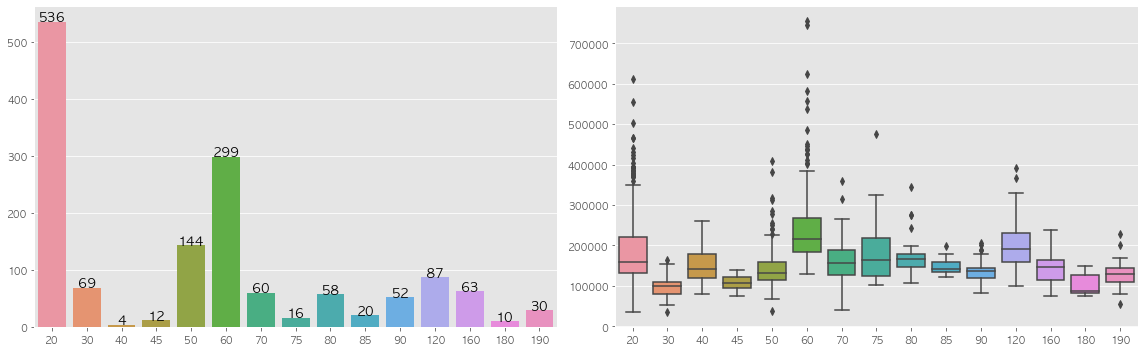

In [16]:
nor_compare_plot(x = 'MSSubClass', y = 'SalePrice', data = final_data)

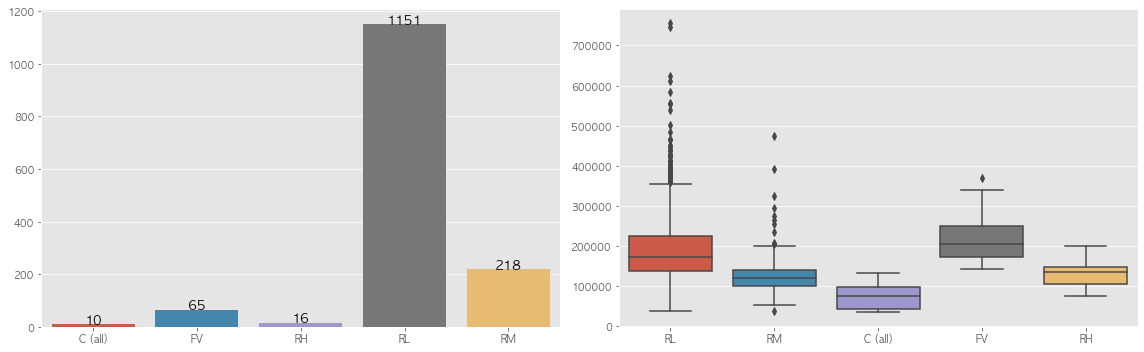

In [17]:
nor_compare_plot(x = 'MSZoning', y = 'SalePrice', data = final_data)

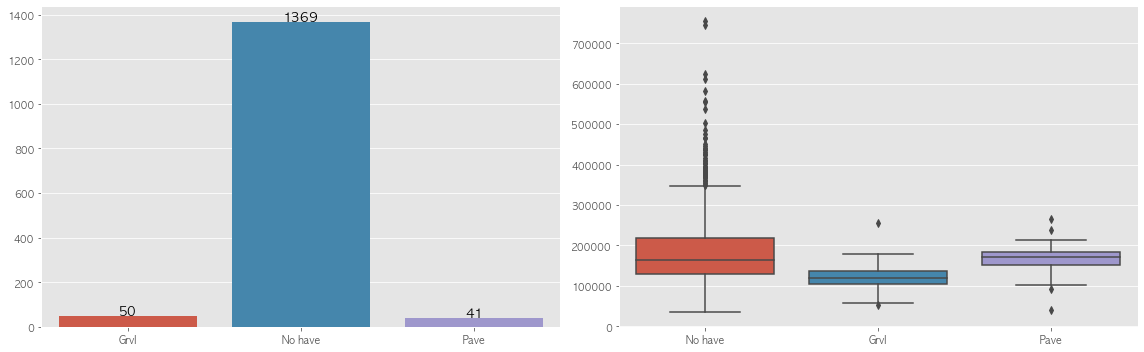

In [18]:
nor_compare_plot(x = 'Alley', y = 'SalePrice', data = final_data)

- 대부분의 관측치에서 건물로 접근하는 골목이 없지만, 골목이 있는 경우 포장된 골목과 비포장 골목에 따라 가격 차이가 있음을 확인할 수 있다.

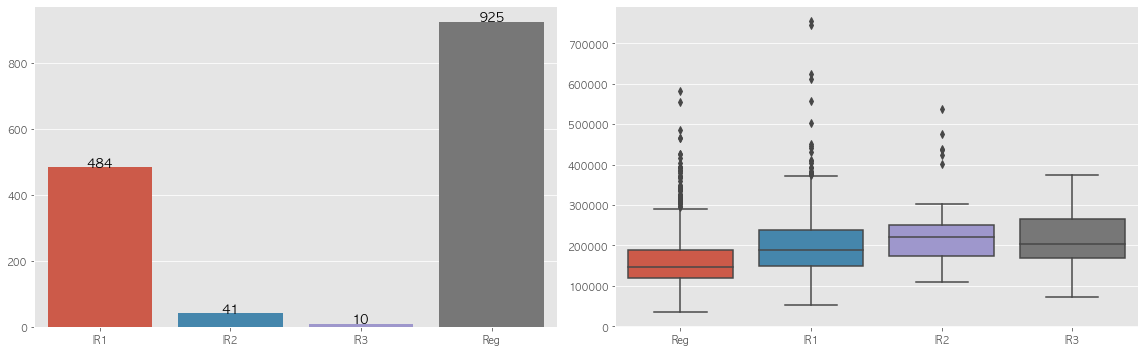

In [19]:
nor_compare_plot(x = 'LotShape', y = 'SalePrice', data = final_data)

- **LotShape** 변수에 총 4개의 범주가 있지만, 시각화를 통해 불규칙한 건물들(R1, R2, R3)의 **SalePrice** 분포가 비슷함을 확인할 수 있다.


- 총 4개의 범주를 **규칙**과 **불규칙**을 의미하는 2개의 범주로 줄인 **NewLotShape** 변수를 만들어 확인해보자.

### 5.2.1. 'NewLotShape' 변수 생성

In [20]:
# 'NewLotShape' 변수 생성
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

final_data['NewLotShape'] = np.nan

for index in final_data.index:
    
    value = final_data.loc[index, 'LotShape']
    
    if value == 'Reg':
        final_data.loc[index, 'NewLotShape'] = 'Reg'
        
    else:
        final_data.loc[index, 'NewLotShape'] = 'IR'
        
print('Shape of final_data *After Create* :', final_data.shape, '\n')
print('Unique of values of NewLotShape :', final_data['NewLotShape'].unique())

Shape of final_data *Before Create* : (1460, 82) 

Shape of final_data *After Create* : (1460, 83) 

Unique of values of NewLotShape : ['Reg' 'IR']


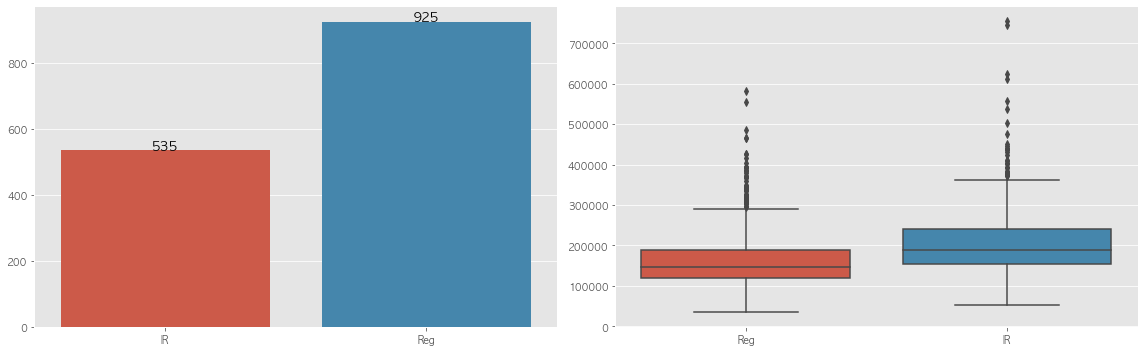

In [21]:
nor_compare_plot(x = 'NewLotShape', y = 'SalePrice', data = final_data)

- 규칙적인 건물과 불규칙적인 건물 모두 이상치가 존재하지만, 두 건물에 따라 **SalePrice** 차이가 있음을 확인할 수 있다.

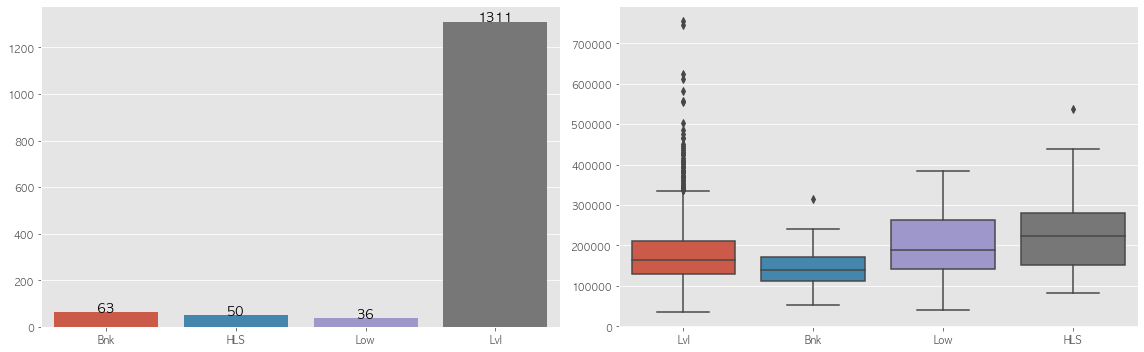

In [22]:
nor_compare_plot(x = 'LandContour', y = 'SalePrice', data = final_data)

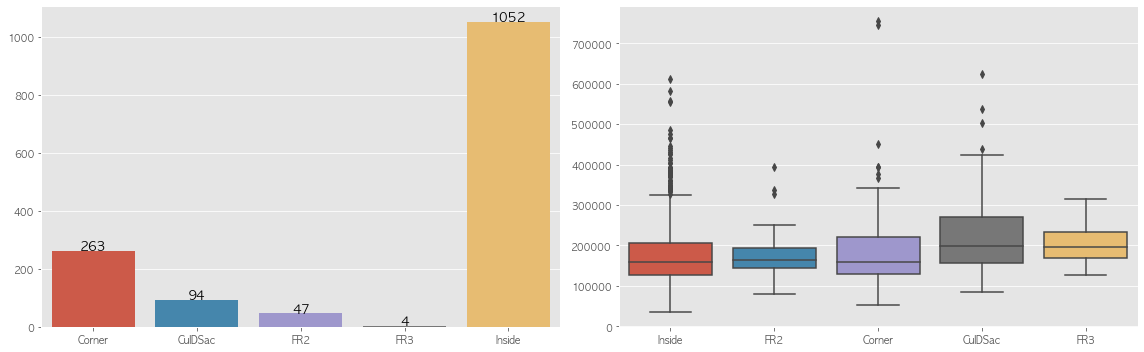

In [23]:
nor_compare_plot(x = 'LotConfig', y = 'SalePrice', data = final_data)

- **LotConfig** 변수의 범주에 따라 **SalePrice** 차이는 크게 없는 것으로 보인다.

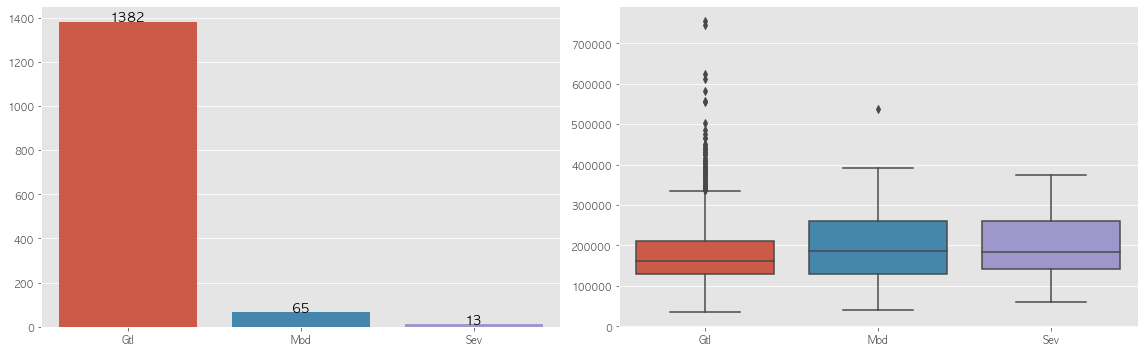

In [24]:
nor_compare_plot(x = 'LandSlope', y = 'SalePrice', data = final_data)

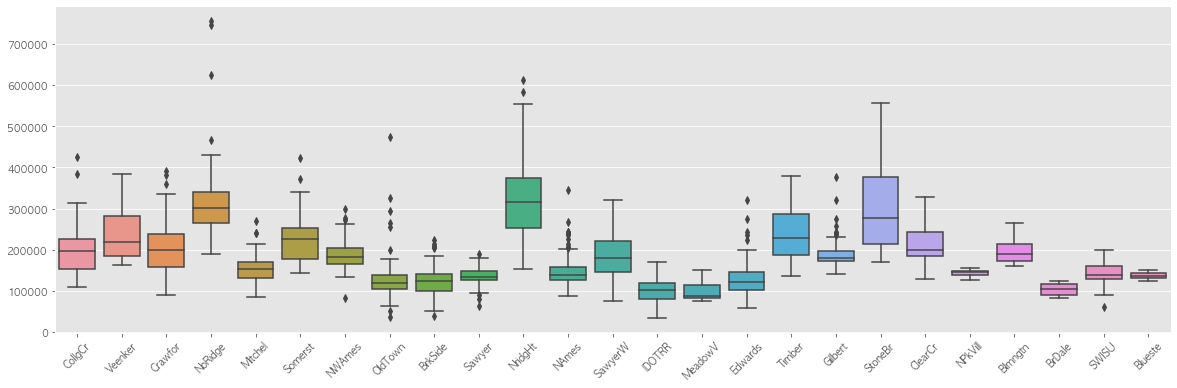

In [25]:
# 'Neighborhood' & 'SalePrice'
plt.figure(figsize = (20, 6))

sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = final_data)
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('')
plt.show()

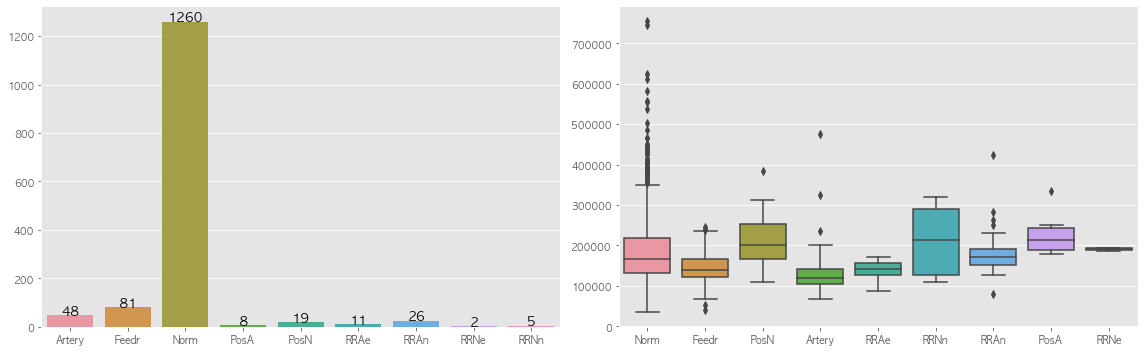

In [26]:
nor_compare_plot(x = 'Condition1', y = 'SalePrice', data = final_data)

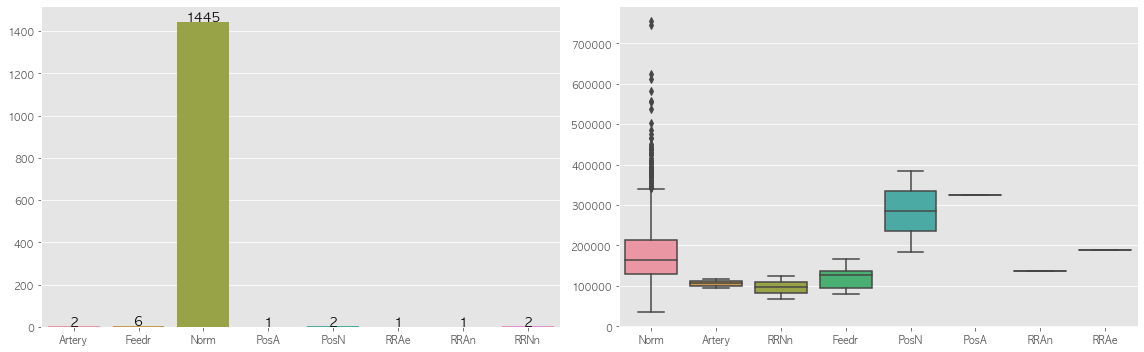

In [27]:
nor_compare_plot(x = 'Condition2', y = 'SalePrice', data = final_data)

- 여러 조건들의 근접성에 따라 **SalePrice**에 차이가 있음을 볼 수 있다.


- 하지만 대부분의 관측치가 **Norm** 범주에 해당함을 확인할 수 있다.


- Condition1변수를 **Norm, Street, Positive, Rail** 4개의 범주로 통합하여 새로운 변수로 만들어주자.


- 또한, Condition1과 Condition2 변수를 함께 사용하여 **조건이 없는 경우**와 **조건이 한 개 이상인 경우**를 나타내는 변수를 만들어주자.

### 5.2.2. 'NewCondition1' & 'CountCon' 변수 생성

In [28]:
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

# 'NewCondition1' 변수 생성
final_data['NewCondition1'] = np.nan

for index in final_data.index:
    
    value = final_data.loc[index, 'Condition1']
    
    if (value == 'Artery') | (value == 'Feedr'):
        final_data.loc[index, 'NewCondition1'] = 'Street'
        
    elif (value == 'PosN') | (value == 'PosA'):
        final_data.loc[index, 'NewCondition1'] = 'Positive'
        
    elif value == 'Norm':
        final_data.loc[index, 'NewCondition1'] = 'Norm'
        
    else:
        final_data.loc[index, 'NewCondition1'] = 'Rail'
        
print('Unique values of NewCondition1 :', final_data['NewCondition1'].unique(), '\n')

# 'CountCon' 변수 생성
final_data['CountCon'] = np.nan

for index in final_data.index:
    
    first_value = modify_data.loc[index, 'Condition1']
    second_value = modify_data.loc[index, 'Condition2']
    
    # 'Condition1'과 'Condition2' 변수 모두 'Norm'인 경우
    if (first_value == 'Norm') & (second_value == 'Norm'):
        final_data.loc[index, 'CountCon'] = 0
    
    else:
        final_data.loc[index, 'CountCon'] = 1

print('Unique values of CountCon :', final_data['CountCon'].unique(), '\n')
print('Shape of final_data *After Create* :', final_data.shape)

Shape of final_data *Before Create* : (1460, 83) 

Unique values of NewCondition1 : ['Norm' 'Street' 'Positive' 'Rail'] 

Unique values of CountCon : [0. 1.] 

Shape of final_data *After Create* : (1460, 85)


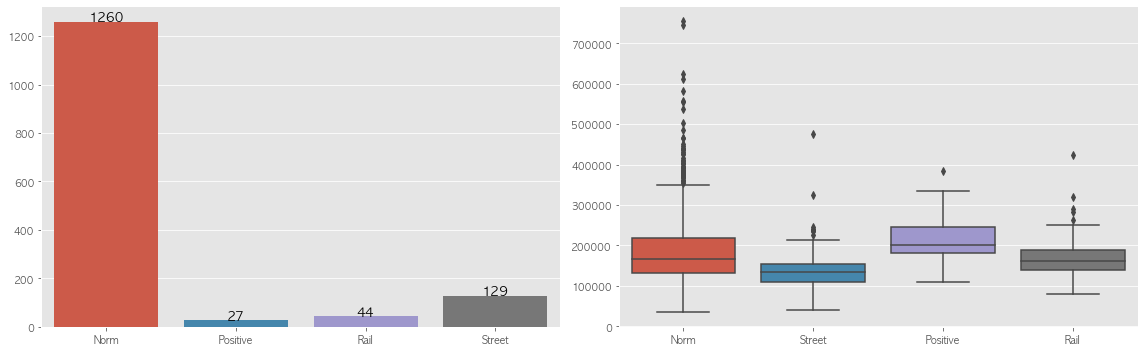

In [29]:
nor_compare_plot(x = 'NewCondition1', y = 'SalePrice', data = final_data)

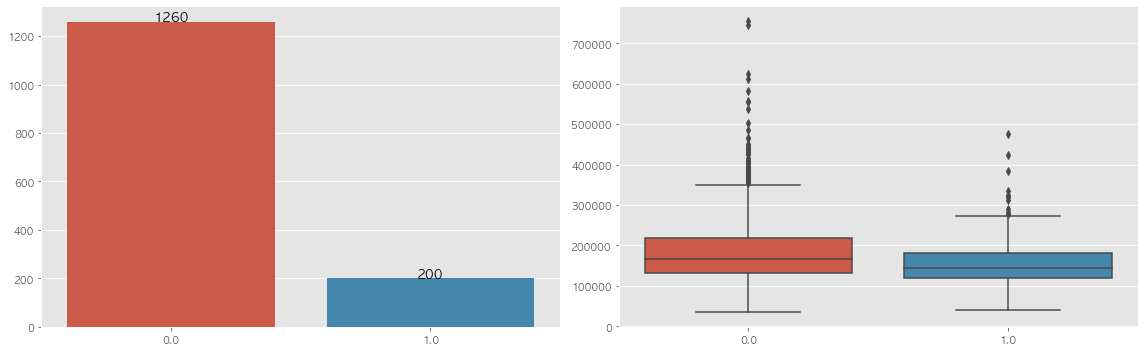

In [30]:
nor_compare_plot(x = 'CountCon', y = 'SalePrice', data = final_data)

- **NewCondition1**과 **CountCon** 변수에 따라 **SalePrice**의 차이가 있음을 확인할 수 있다.


- **NewCondition1**이 **'Street'** 범주에 속할 때, 다른 범주보다 중앙값이 낮음을 볼 수 있다.


- **Street**의 의미로 보아 도로랑 근접해 있어 소음 발생 우려가 있기 때문에 가격이 낮음을 추측해 볼 수 있다.

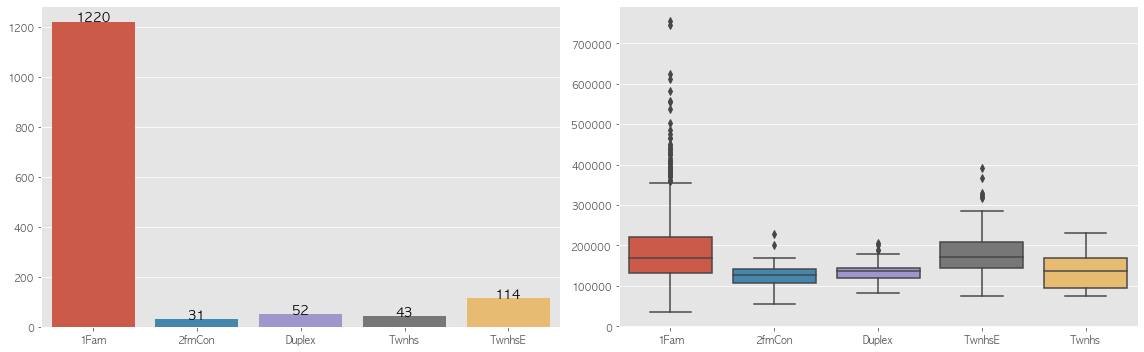

In [31]:
nor_compare_plot(x = 'BldgType', y = 'SalePrice', data = final_data)

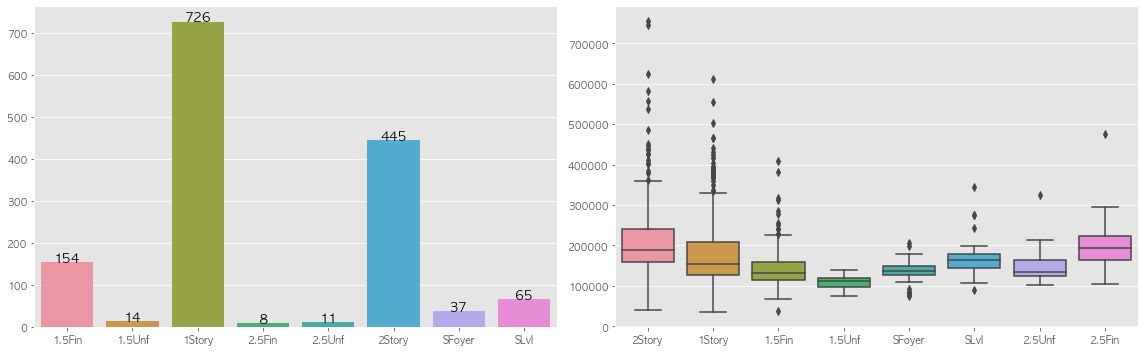

In [32]:
nor_compare_plot(x = 'HouseStyle', y = 'SalePrice', data = final_data)

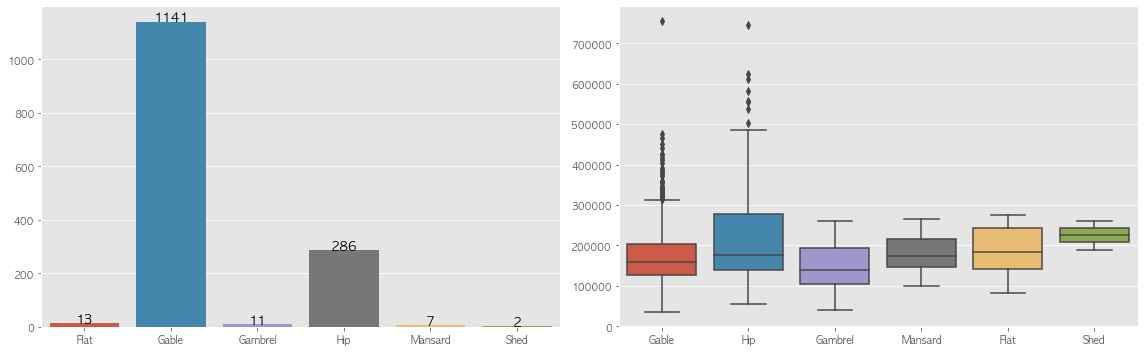

In [33]:
nor_compare_plot(x = 'RoofStyle', y = 'SalePrice', data = final_data)

- **Exterior1st**와 **Exterior2nd** 두 변수의 범주에 한 개의 관측치만 존재하는 범주가 있다.


- 따라서 두 변수를 이용하여 똑같은 재료를 사용했다면 **1**, 그렇지 않으면 **0**을 의미하는 변수를 만들어주자.

### 5.2.3. 'SameExterior' 변수 생성

In [34]:
# 'SameExterior' 변수 생성
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

final_data['SameExterior'] = np.nan

for index in final_data.index:
    
    first_exterior = final_data.loc[index, 'Exterior1st']
    second_exterior = final_data.loc[index, 'Exterior2nd']
    
    if first_exterior == second_exterior:
        final_data.loc[index, 'SameExterior'] = 1
    
    else:
        final_data.loc[index, 'SameExterior'] = 0
        
print('Shape of final_data *After Create* :', final_data.shape, '\n')
print('Unique vlaues of SameExterior :', final_data['SameExterior'].unique())

Shape of final_data *Before Create* : (1460, 85) 

Shape of final_data *After Create* : (1460, 86) 

Unique vlaues of SameExterior : [1. 0.]


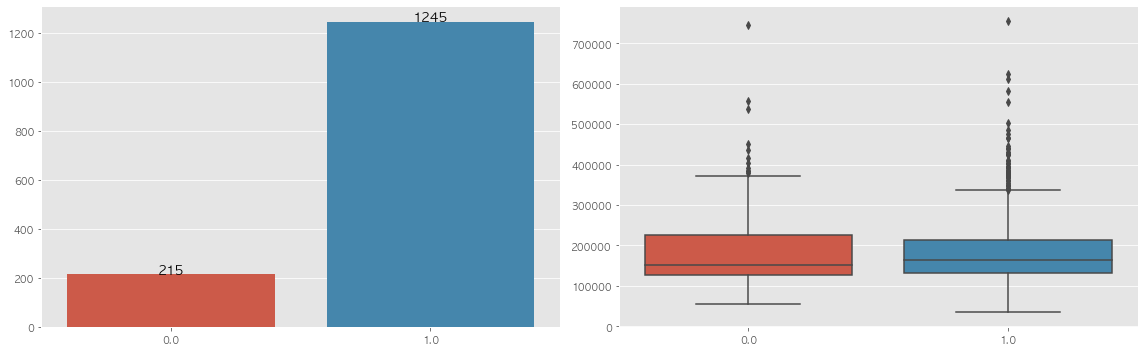

In [35]:
nor_compare_plot(x = 'SameExterior', y = 'SalePrice', data = final_data)

- 건물의 외부 공사를 하는 데 있어서 **똑같은 재료를 사용했는지 여부**에 대해서는 큰 차이가 없음을 확인할 수 있다.

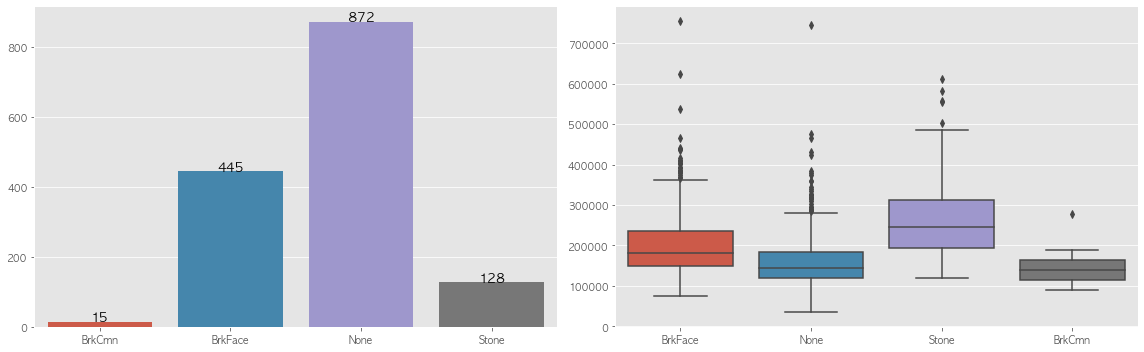

In [36]:
nor_compare_plot(x = 'MasVnrType', y = 'SalePrice', data = final_data)

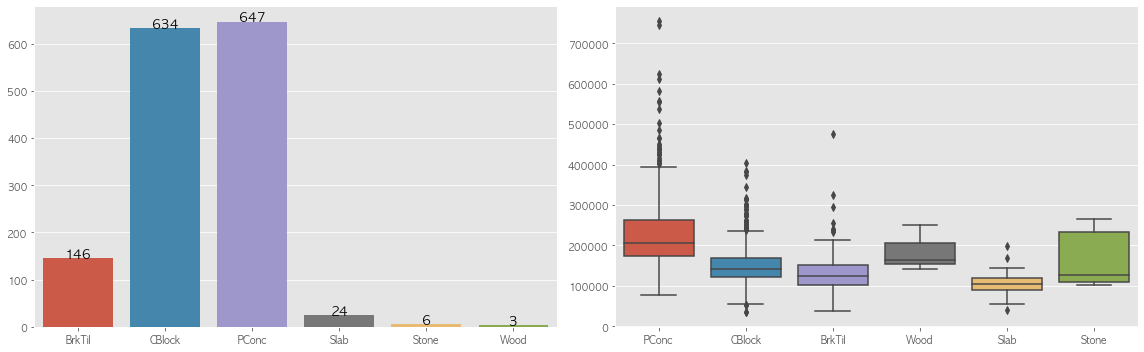

In [37]:
nor_compare_plot(x = 'Foundation', y = 'SalePrice', data = final_data)

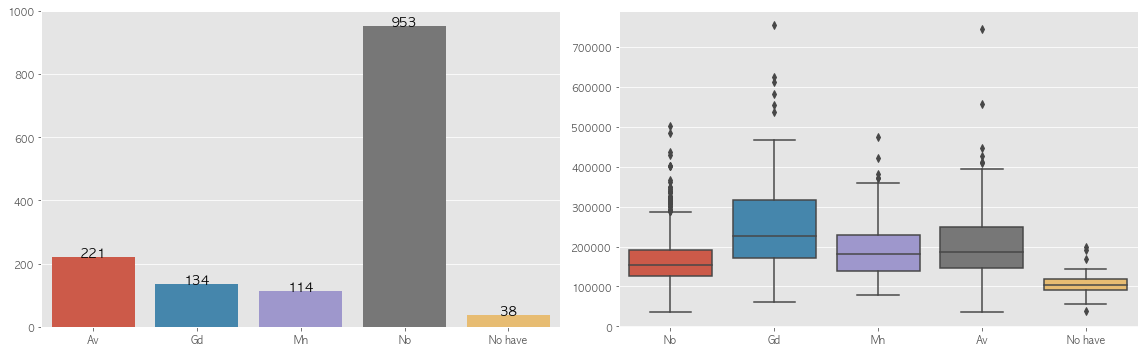

In [38]:
nor_compare_plot(x = 'BsmtExposure', y = 'SalePrice', data = final_data)

- **Basement Exposure**이 존재하는 관측치가 SalePrice가 높게 분포되어있음을 확인할 수 있다.


- **Basement Exposure**이 존재하는 관측치의 SalePrice 분포가 비슷하므로 범주를 합쳐주도록 하자.


- Exposure이 존재하면 **1**, 그렇지 않으면 **0**을 의미하는 **NewBsmtExposure** 변수를 만들자.

### 5.2.4. 'NewBsmtExposure' 변수 생성

In [39]:
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

final_data['NewBsmtExposure'] = np.nan

for index in final_data.index:
    
    value = final_data.loc[index, 'BsmtExposure']
    
    if (value == 'No') | (value == 'No have'):
        final_data.loc[index, 'NewBsmtExposure'] = 0
    
    else:
        final_data.loc[index, 'NewBsmtExposure'] = 1

print('Shape of final_data *After Create* :', final_data.shape, '\n')
print('Unique values of NewBsmtExposure :', final_data['NewBsmtExposure'].unique())

Shape of final_data *Before Create* : (1460, 86) 

Shape of final_data *After Create* : (1460, 87) 

Unique values of NewBsmtExposure : [0. 1.]


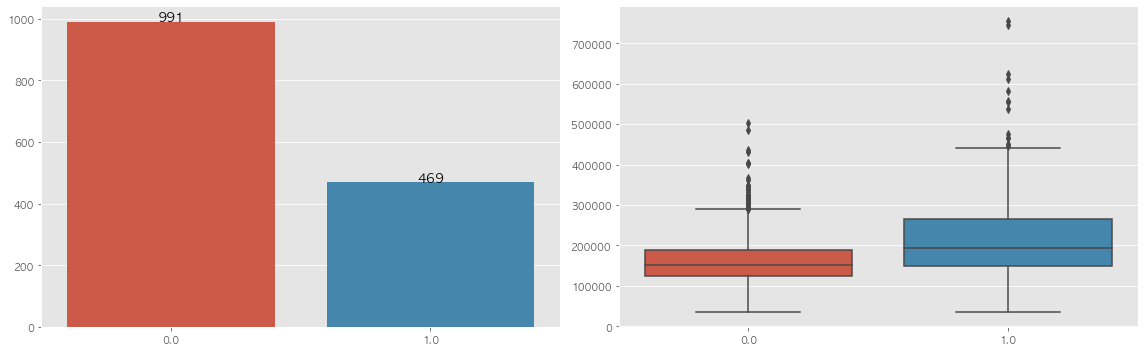

In [40]:
nor_compare_plot(x = 'NewBsmtExposure', y = 'SalePrice', data = final_data)

- **BsmtExposure** 변수보다 뚜렷한 차이가 있음을 확인할 수 있다.


- 또한, Exposure이 존재하는 경우에 중앙값이 높음을 확인할 수 있다.

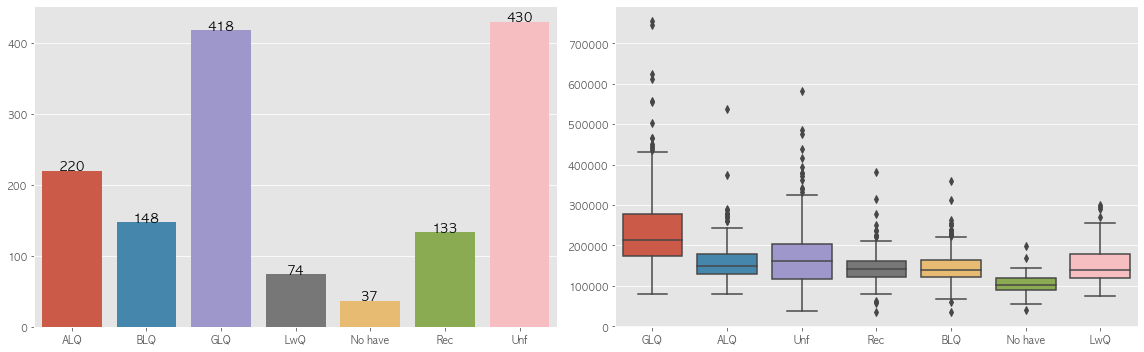

In [41]:
nor_compare_plot(x = 'BsmtFinType1', y = 'SalePrice', data = final_data)

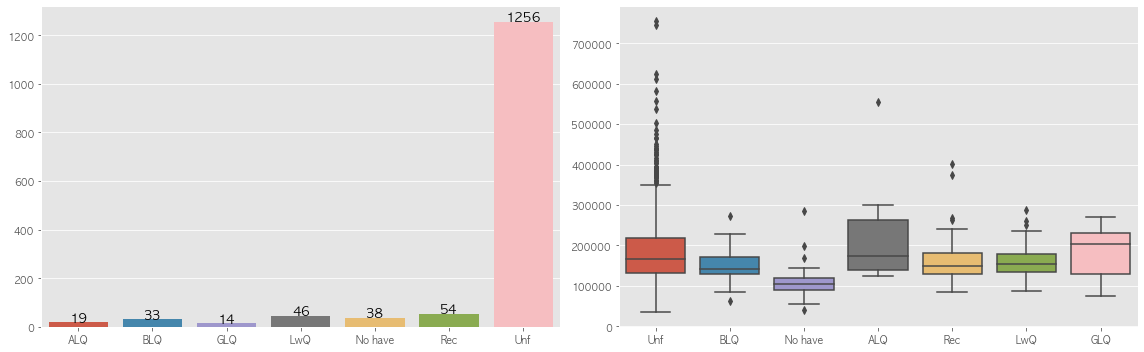

In [42]:
nor_compare_plot(x = 'BsmtFinType2', y = 'SalePrice', data = final_data)

- **BsmtFinType1, BsmtFinType2** 두 변수를 이용하여 **Finished, Unfinished, No have** 를 의미하는 변수를 만들어보자.

### 5.2.5. 'NewBsmtFin' 변수 생성

In [43]:
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

final_data['NewBsmtFin'] = np.nan

for index in final_data.index:
    
    first  = final_data.loc[index, 'BsmtFinType1']
    second = final_data.loc[index, 'BsmtFinType2']
    
    # 우선 지하가 없는 경우
    if first == 'No have':
        final_data.loc[index, 'NewBsmtFin'] = 0
    
    # 첫 번째 타입은 마무리가 되었지만, 두 번째 타입은 마무리가 되지 않은 경우
    elif (first != 'No have') & (first != 'Unf') & (second == 'Unf'):
        final_data.loc[index, 'NewBsmtFin'] = 1
        
    # 첫 번째와 두 번째 모두 마무리가 된 경우
    elif (first != 'No have') & (first != 'Unf') & (second != 'Unf'):
        final_data.loc[index, 'NewBsmtFin'] = 2
        
    # 첫 번째와 두 번째 모두 마무리가 되지 않은 경우
    else:
        final_data.loc[index, 'NewBsmtFin'] = 3

print('Shape of final_data *After Create* :', final_data.shape, '\n')
print('Unique values of NewBsmtFin :', np.sort(final_data['NewBsmtFin'].unique()))

Shape of final_data *Before Create* : (1460, 87) 

Shape of final_data *After Create* : (1460, 88) 

Unique values of NewBsmtFin : [0. 1. 2. 3.]


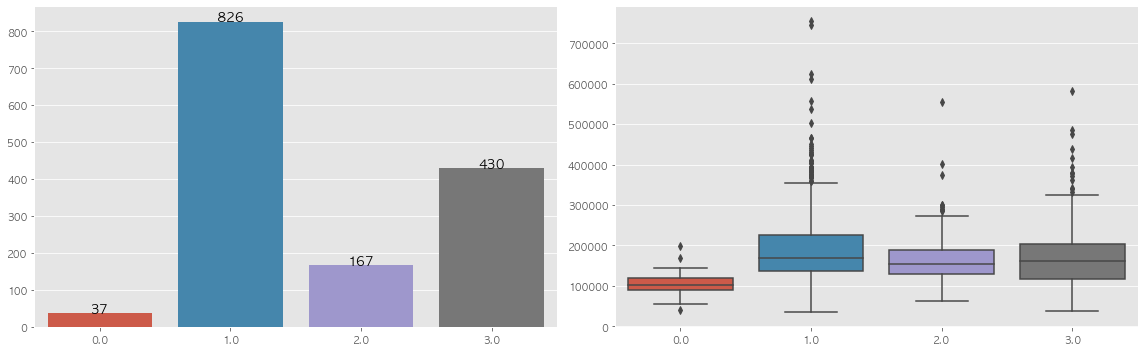

In [44]:
nor_compare_plot(x = 'NewBsmtFin', y = 'SalePrice', data = final_data)

- 새로 생성한 **NewBsmtFin** 변수의 범주에 따라 가격에 큰 차이가 없는 것으로 확인된다.

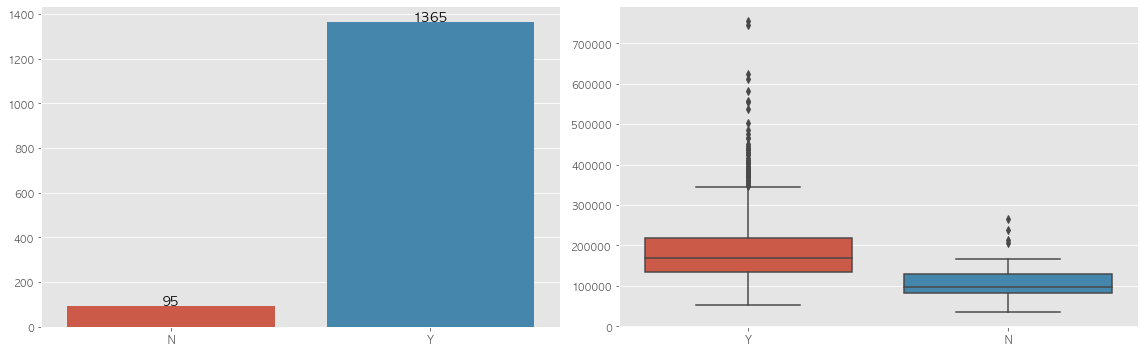

In [45]:
nor_compare_plot(x = 'CentralAir', y = 'SalePrice', data = final_data)

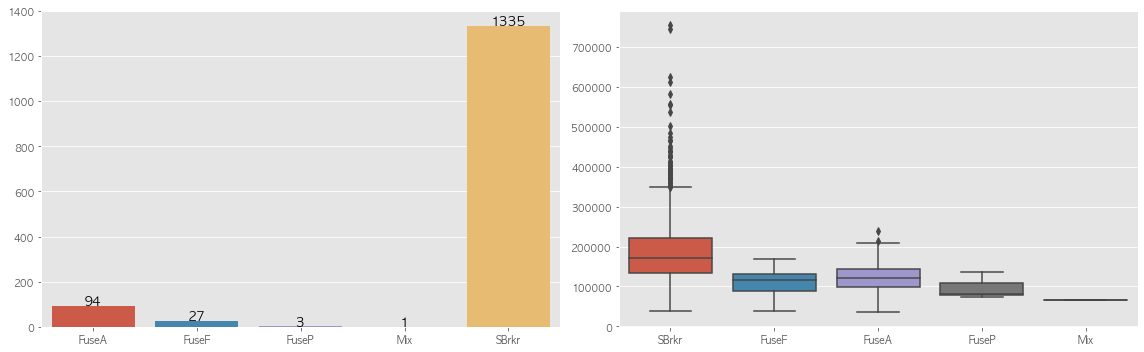

In [46]:
nor_compare_plot(x = 'Electrical', y = 'SalePrice', data = final_data)

- **Electrical** 변수의 경우, **SBrkr** 범주에 해당할 때 SalePrice의 평균이 가장 높다.


- 다른 범주에 해당하는 관측치가 매우 적으므로, Electrical 변수를 **SBrkr**과 **Other** 두 범주로 바꿔주도록 하자.

In [47]:
print('Unique values of Electrical :', final_data['Electrical'].unique(), '\n')

final_data['Electrical'] = final_data['Electrical'].apply(lambda x: x if x == 'SBrkr' else 'Other')
print('Unique values of Electrical :', final_data['Electrical'].unique())

Unique values of Electrical : ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix'] 

Unique values of Electrical : ['SBrkr' 'Other']


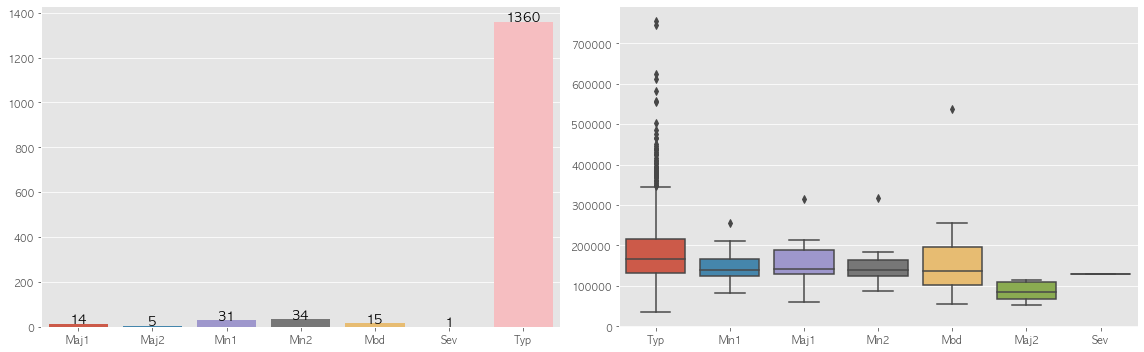

In [48]:
nor_compare_plot(x = 'Functional', y = 'SalePrice', data = final_data)

- **Functional** 변수의 범주에 따라서는 **SalePrice**에 큰 차이가 없는 것으로 판단된다.

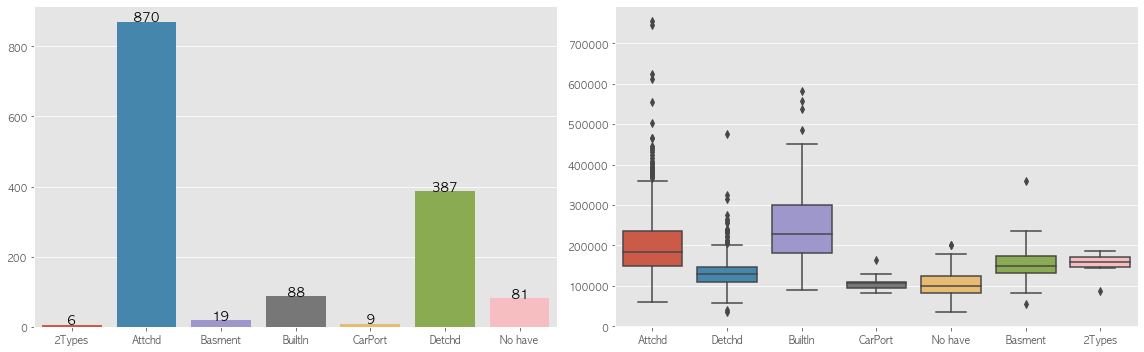

In [49]:
nor_compare_plot(x = 'GarageType', y = 'SalePrice', data = final_data)

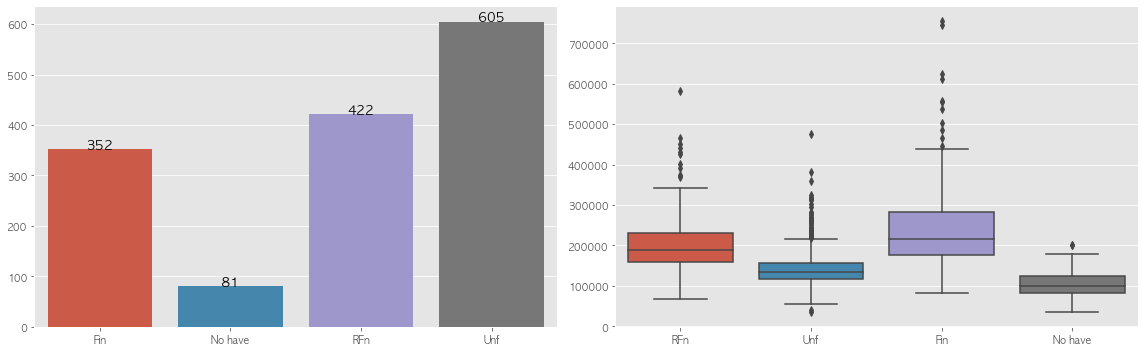

In [50]:
nor_compare_plot(x = 'GarageFinish', y = 'SalePrice', data = final_data)

- 위의 시각화를 통해, 차고의 내부 마감 여부에 따라 가격에 차이가 있음을 확인할 수 있다.

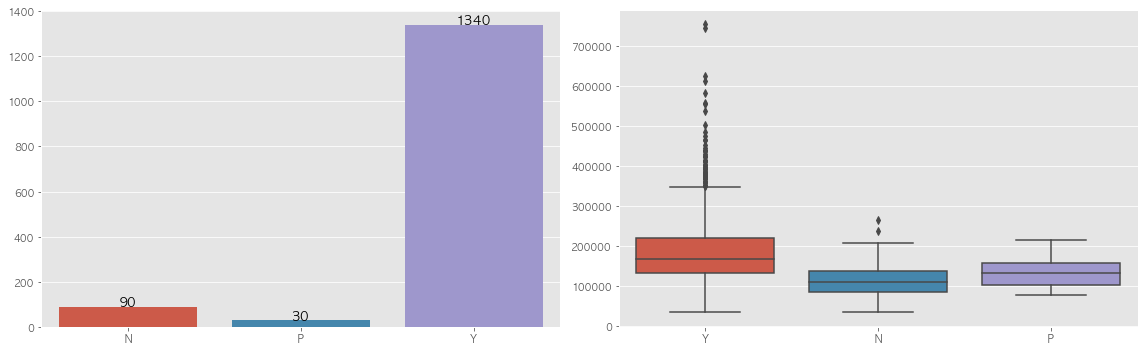

In [51]:
nor_compare_plot(x = 'PavedDrive', y = 'SalePrice', data = final_data)

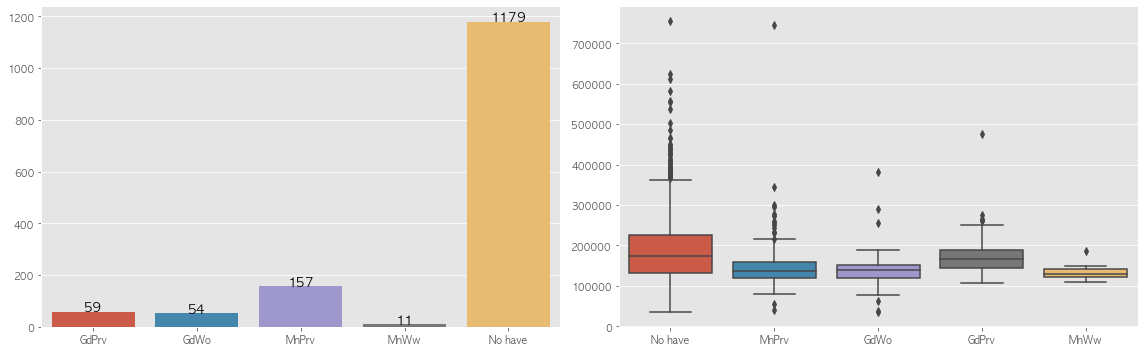

In [52]:
nor_compare_plot(x = 'Fence', y = 'SalePrice', data = final_data)

- **Fence** 여부를 나타내는 변수를 만들어주려고 했지만, 위의 시각화를 통하여 큰 차이가 없음을 확인할 수 있다.


- 또한, 안정성을 나타내는 변수들 생성하려고 했지만 관련된 변수가 없다고 판단되므로 **Fence** 변수는 사용하지 않도록 한다.

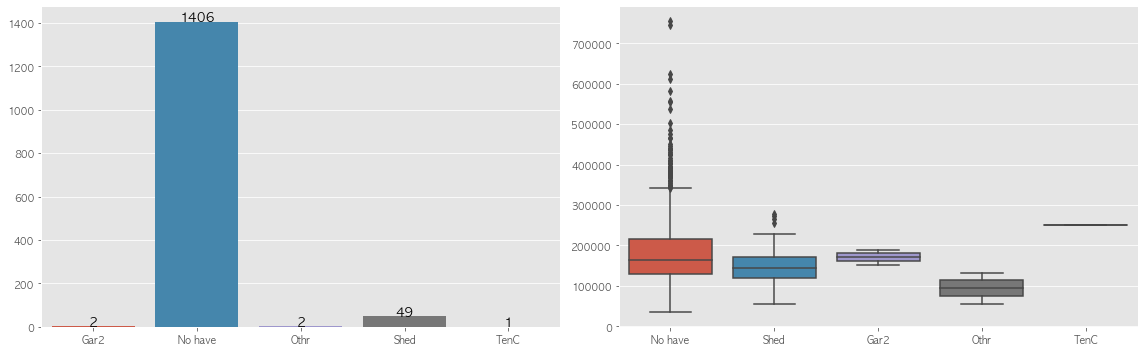

In [53]:
nor_compare_plot(x = 'MiscFeature', y = 'SalePrice', data = final_data)

- **MiscFeature** 건물의 부가적인 기능을 나타내는 변수이다.


- 하지만 기타 기능이 있다고 해서 가격에 큰 차이가 없으므로, 분석에 도움이 되지 않을것으로 판단된다.

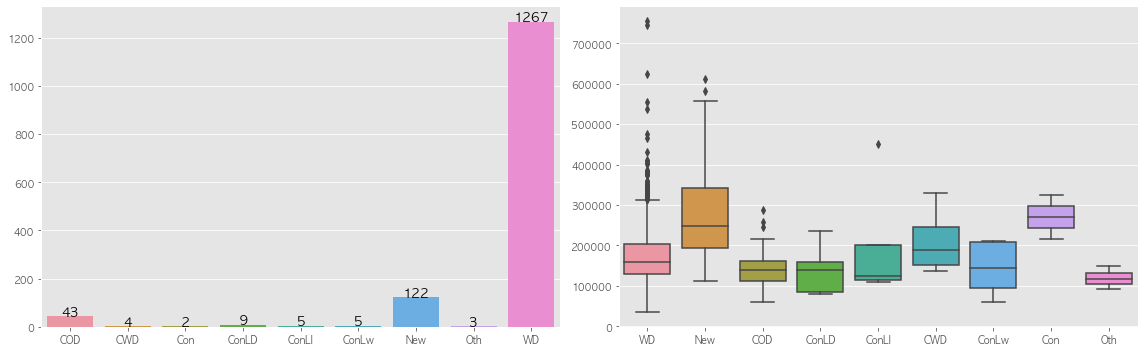

In [54]:
nor_compare_plot(x = 'SaleType', y = 'SalePrice', data = final_data)

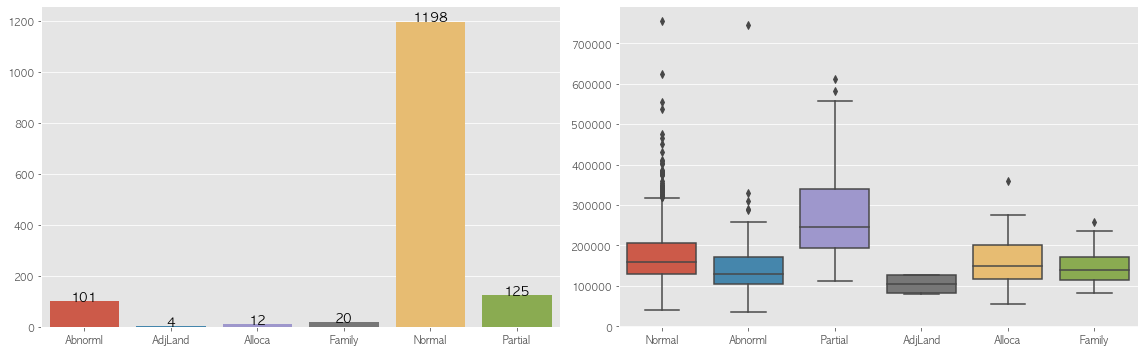

In [55]:
nor_compare_plot(x = 'SaleCondition', y = 'SalePrice', data = final_data)

- **Normal, Partial, Abnorml** 3개의 범주에서 관측치가 충분히 확보되며, 뚜렷한 차이를 확인할 수 있다.


- 관측치가 **AdjLand** 범주에 속할 때, 낮은값에 분포해 있음을 확인할 수 있지만 관측치가 4개로 매우 적다.


- 따라서 **SaleCondition** 변수를 **Normal, Partial, Abnorml, Other** 4개의 범주로 축소해주자.

### 5.2.6. 'NewSaleCondition' 변수 생성

In [56]:
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

final_data['NewSaleCondition'] = np.nan

for index in final_data.index:
    
    value = final_data.loc[index, 'SaleCondition']
    
    if value == 'Normal':
        final_data.loc[index, 'NewSaleCondition'] = value
        
    elif value == 'Partial':
        final_data.loc[index, 'NewSaleCondition'] = value
        
    elif value == 'Abnorml':
        final_data.loc[index, 'NewSaleCondition'] = value
        
    else:
        final_data.loc[index, 'NewSaleCondition'] = 'Other'
        
print('Shape of final_data *After Create* :', final_data.shape, '\n')
print('Unique values of NewSaleCondition :', final_data['NewSaleCondition'].unique())

Shape of final_data *Before Create* : (1460, 88) 

Shape of final_data *After Create* : (1460, 89) 

Unique values of NewSaleCondition : ['Normal' 'Abnorml' 'Partial' 'Other']


## 5.3. Ordinal Variables & SalePrice EDA

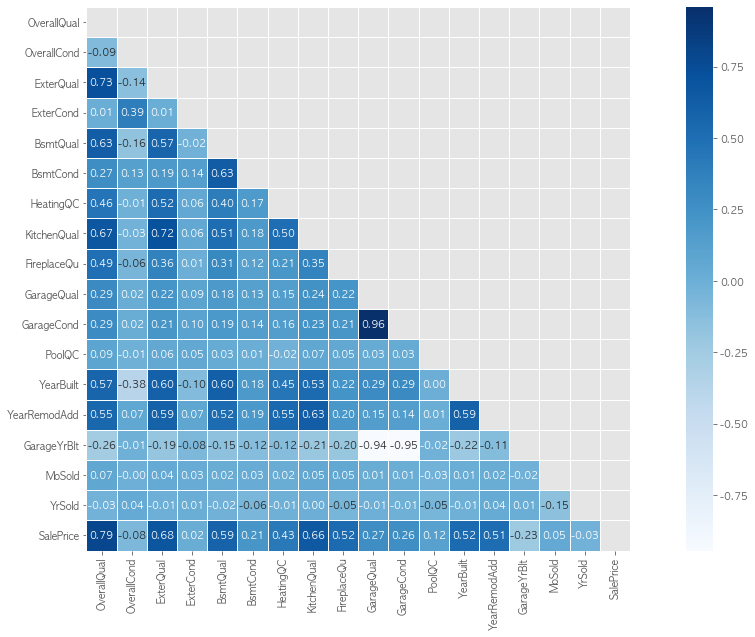

In [57]:
# 순서형 변수와 'SalePrice'의 관계 탐색
or_list = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
           'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'YearBuilt', 'YearRemodAdd',
           'GarageYrBlt', 'MoSold', 'YrSold', 'SalePrice']

# 우선 히트맵을 통해 상관계수를 살펴보도록 하자.
cor_data = final_data[or_list].corr()

# 시각화 과정
mask = np.zeros_like(cor_data, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (20, 10))

sns.heatmap(cor_data, mask = mask, cmap = 'Blues', square = True, 
            annot = True, fmt = '.2f', linewidths = 0.5)
plt.show()

- **SalePrice** 변수와 **OverallQual, ExterQual, BsmtQual, HeatingQC, KitchenQual, FireplaceQu, YearBuilt, YearRemodAdd** 변수가 상관계수가 높음을 확인할 수 있다.


- 또한, SalePrice 변수를 제외한 각 변수들끼리도 상관계수가 높은 값이 나타난다.

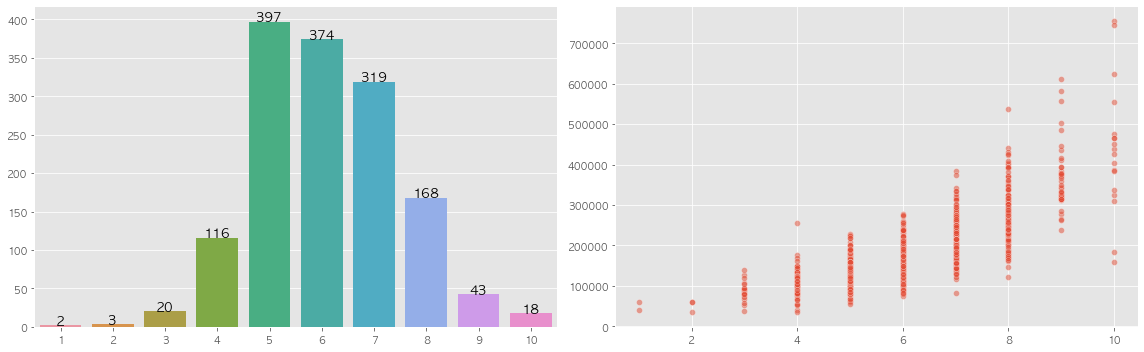

In [58]:
or_compare_plot(x = 'OverallQual', y = 'SalePrice', data = final_data)

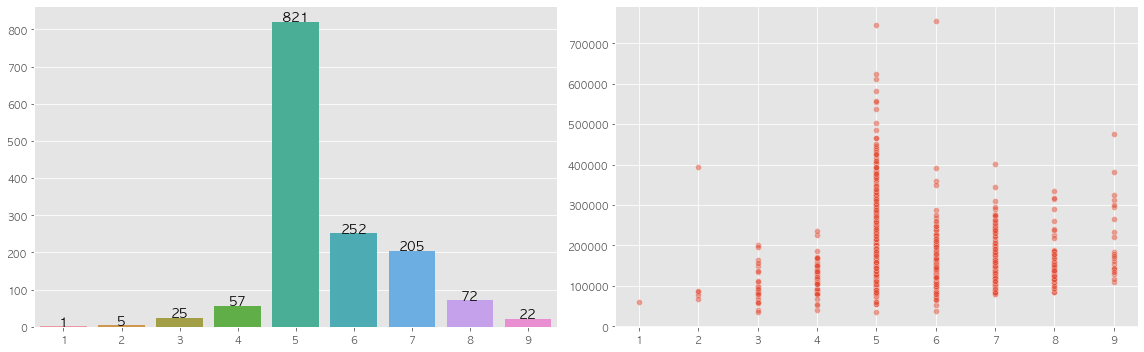

In [59]:
or_compare_plot(x = 'OverallCond', y = 'SalePrice', data = final_data)

- 변수에 대한 설명에 따르면 **OverallQual** 변수는 건물 자체의 품질에 대한 평가를 의미한다.


- **OverallCond** 변수는 해당 건물에 대한 고객들의 평가를 의미하는 것으로 보인다.


- 설문조사 대상자들은 평가와 관련된 문항의 경우 중간으로 응답하려는 경향이 있기 때문에 위와 같은 결과가 나온것으로 판단된다.


- SalePrice 변수를 예측하는 데 있어서 **OverallCond** 변수보다는 **OverallQual** 변수가 더 적절하다고 판단된다.

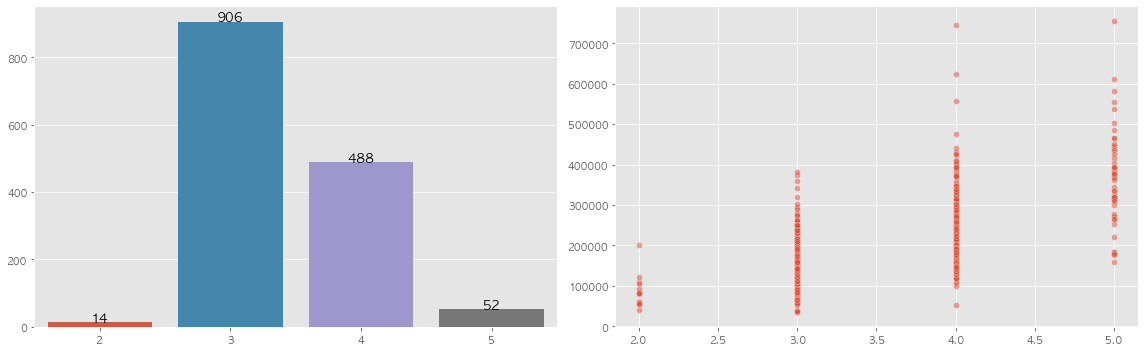

In [60]:
or_compare_plot(x = 'ExterQual', y = 'SalePrice', data = final_data)

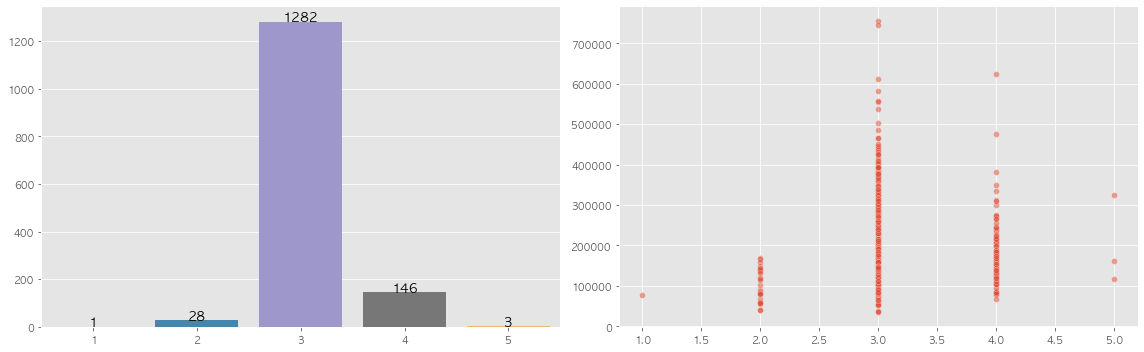

In [61]:
or_compare_plot(x = 'ExterCond', y = 'SalePrice', data = final_data)

- **ExterQual**과 **ExterCond** 변수도 위와 똑같은 결과를 보여준다.


- **ExterCond** 변수도 중간응답이 많음을 볼 수 있으며, 평가에 따라 뚜렷한 차이를 확인할 수 없다.

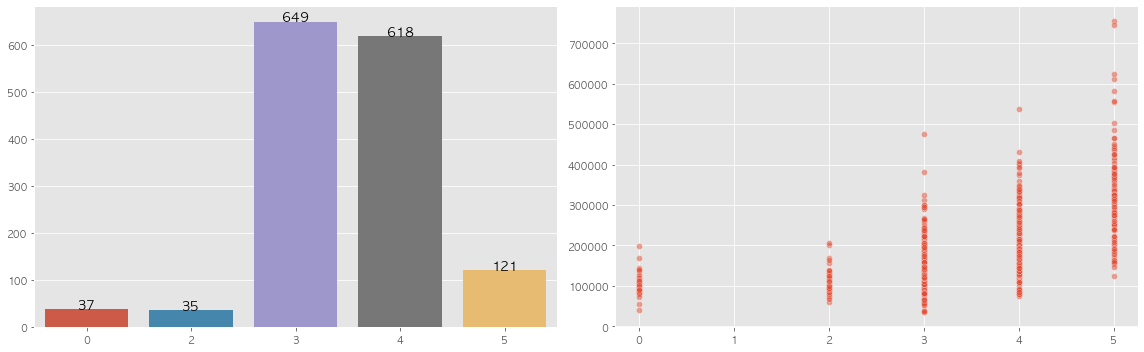

In [62]:
or_compare_plot(x = 'BsmtQual', y = 'SalePrice', data = final_data)

- **BsmtQual** 변수는 지하의 층고를 의미하며, 층고가 높을수록 가격이 올라감을 확인할 수 있다.

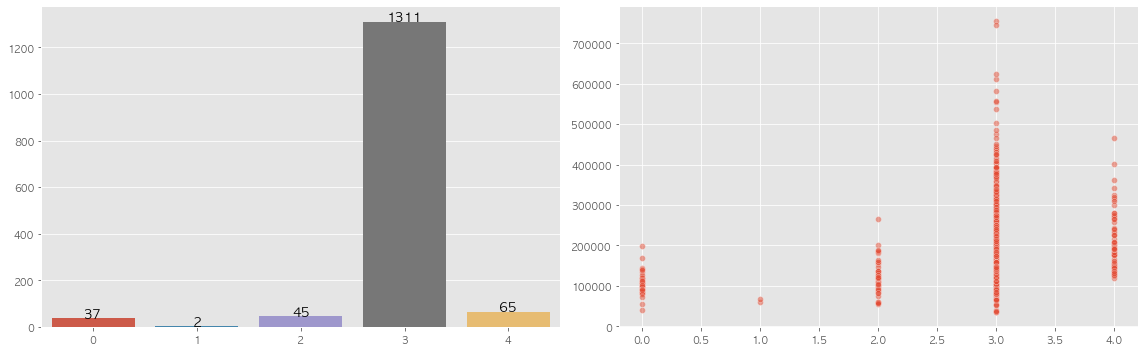

In [63]:
or_compare_plot(x = 'BsmtCond', y = 'SalePrice', data = final_data)

- 지하의 특성상 대부분의 관측치에 약간의 습기가 있으며, **Po**와 **Gd**에 따라 차이가 있음을 확인할 수 있다.

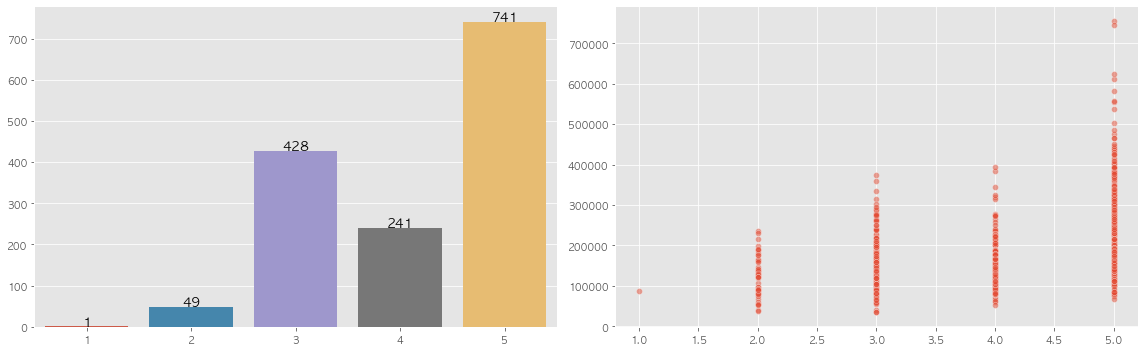

In [64]:
or_compare_plot(x = 'HeatingQC', y = 'SalePrice', data = final_data)

- **Ex** 범주를 제외한 모든 범주에서 SalePrice의 분포가 비슷함을 확인할 수 있다.


- **HeatingQC** 변수를 Excellent 범주에 해당하면 **1**, 그렇지 않으면 **0**을 의미하는 새로운 변수를 만들어주자.

### 5.3.1. 'NewHeatingQC' 변수 생성

In [65]:
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

final_data['NewHeatingQC'] = np.nan

final_data['NewHeatingQC'] = final_data['HeatingQC'].apply(lambda x: 1 if x == 5 else 0)
print('Shape of final_data *After Create* :', final_data.shape, '\n')
print('Unique values of NewHeatingQC :', final_data['NewHeatingQC'].unique())

Shape of final_data *Before Create* : (1460, 89) 

Shape of final_data *After Create* : (1460, 90) 

Unique values of NewHeatingQC : [1 0]


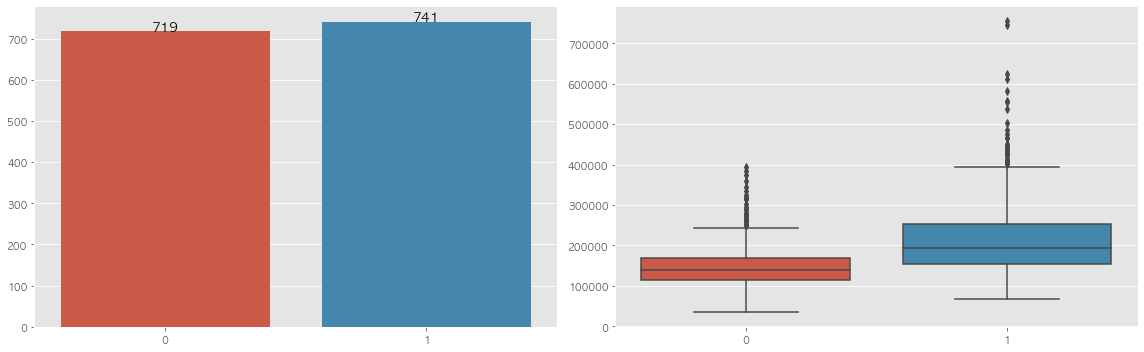

In [66]:
nor_compare_plot(x = 'NewHeatingQC', y = 'SalePrice', data = final_data)

- **NewHeatingQC**에 따라 더욱더 뚜렷한 차이를 확인할 수 있다.

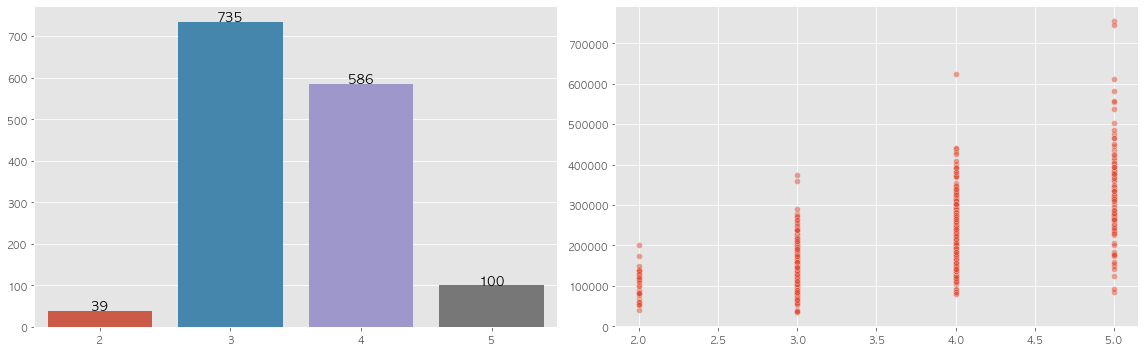

In [67]:
or_compare_plot(x = 'KitchenQual', y = 'SalePrice', data = final_data)

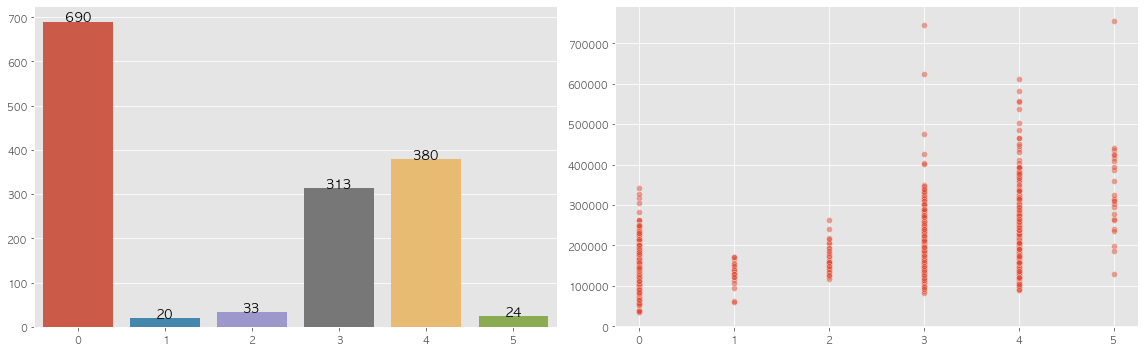

In [68]:
or_compare_plot(x = 'FireplaceQu', y = 'SalePrice', data = final_data)

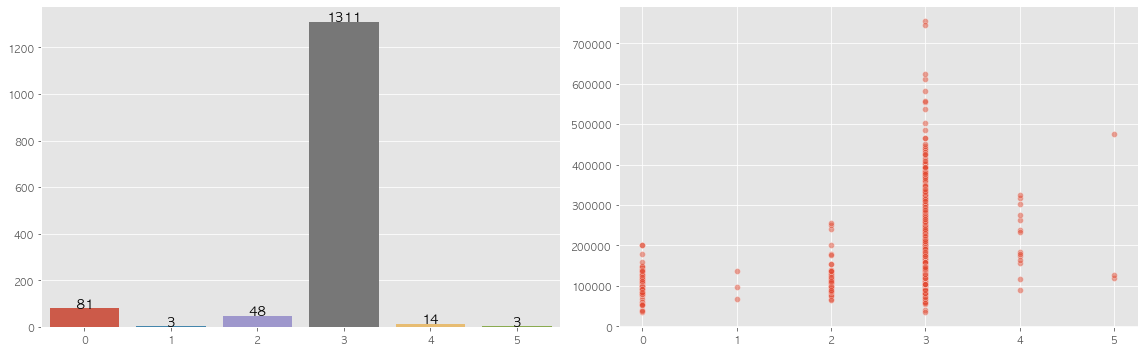

In [69]:
or_compare_plot(x = 'GarageQual', y = 'SalePrice' , data = final_data)

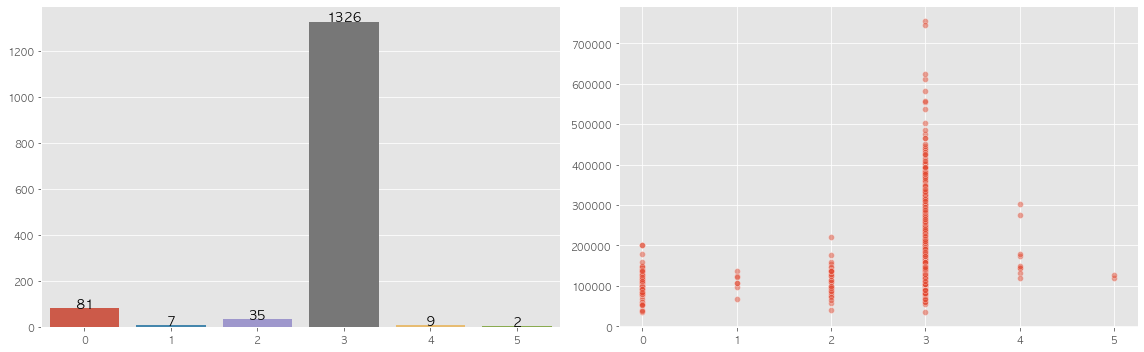

In [70]:
or_compare_plot(x = 'GarageCond', y = 'SalePrice', data = final_data)

- **GarageQual**과 **GarageCond** 두 변수 모두 중간응답이 가장 많음을 확인할 수 있다.


- 또한, 두 변수에 대해서 SalePrice에 큰 차이가 없을을 확인할 수 있다.

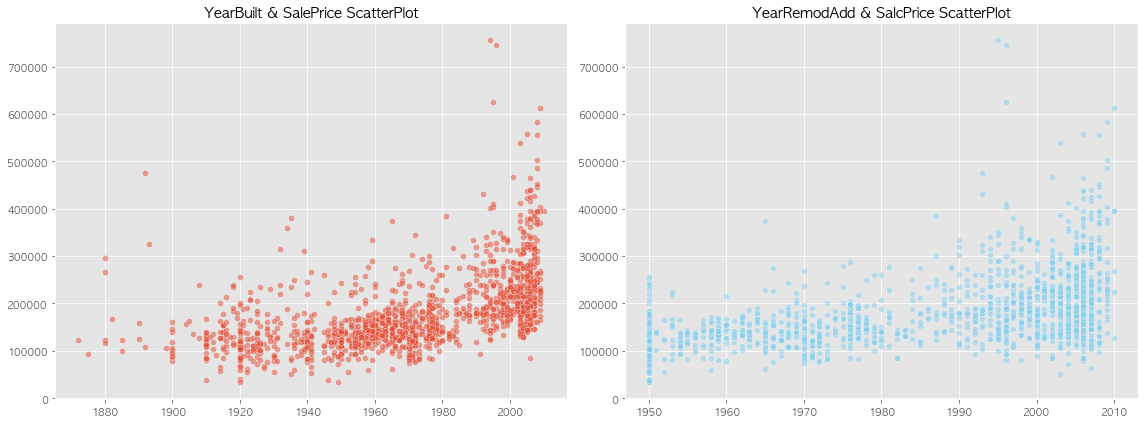

In [71]:
fig, axes = plt.subplots(ncols = 2, figsize = (16, 6))

# 'YearBuilt'
sns.scatterplot(x = 'YearBuilt', y = 'SalePrice', data = final_data, alpha = 0.5, ax = axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('YearBuilt & SalePrice ScatterPlot')

# 'YearRemodAdd'
sns.scatterplot(x = 'YearRemodAdd', y = 'SalePrice', color = 'skyblue', data = final_data, alpha = 0.5, ax = axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('YearRemodAdd & SalcPrice ScatterPlot')

fig.tight_layout()

- 나중에 건축된 건물일수록 또는 최근에 리모델링을 한 건물이 가격이 높게 분포해 있음을 확인할 수 있다.


- 그렇다면 **YearBuilt**와 **YearRemodAdd** 변수 간에 관계가 있을까?

Correlation cofficient between YearBuilt and YearRemodAdd : 0.593 

P-value of correlation coefficient between two variables : 2.754763001940988e-139


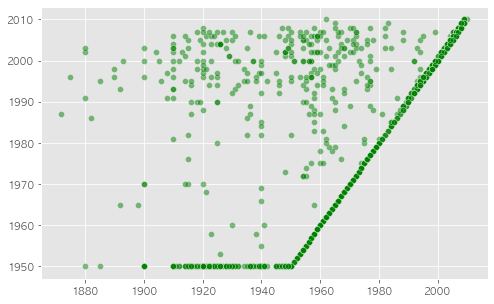

In [72]:
# 'YearBuilt'와 'YearRemodAdd' 두 변수 사이에 관계가 있을까?
cor, pval = stats.pearsonr(x = final_data['YearBuilt'], y = final_data['YearRemodAdd'])

print('Correlation cofficient between YearBuilt and YearRemodAdd :', round(cor, 3), '\n')
print('P-value of correlation coefficient between two variables :', pval)

# 시각화 과정
plt.figure(figsize = (8, 5))

sns.scatterplot(x = 'YearBuilt', y = 'YearRemodAdd', color = 'green', alpha = 0.5, data = final_data)
plt.xlabel('')
plt.ylabel('')
plt.show()

- 두 변수 사이의 상관계수는 약 **0.593**으로 양의 상관관계가 있다.


- 또한, 유의확률이 매우 작은 값으로 유의수준 0.05보다 작으므로 대립가설을 기각할 근거가 없다. 따라서, 두 변수 사이에는 양의 상관관계가 존재한다.

### 5.3.2. 'DiffYear' 변수 생성

In [73]:
# 건축일로부터 몇년후에 리모델링을 했는지 나타내는 변수 만들기
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

final_data['DiffYear'] = final_data['YearRemodAdd'] - final_data['YearBuilt']
print('Shape of final_data *After Create* :', final_data.shape)

Shape of final_data *Before Create* : (1460, 90) 

Shape of final_data *After Create* : (1460, 91)


- **DiffYear** 변수의 값이 0이라면, 리모델링을 하지 않은 건물을 의미한다.


- 리모델링을 하지 않은 건물을 제외하고, 건축일로부터 몇년 후에 리모델링을 했는지에 따라 가격에 차이가 있는지 확인해보자.

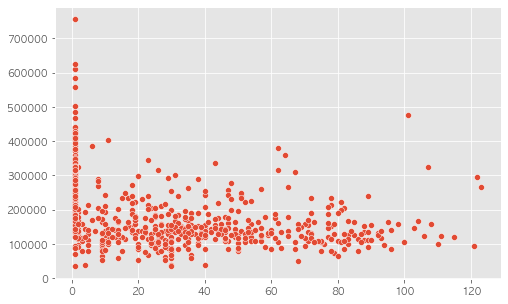

In [74]:
# 'DiffYear' = 0을 제외하고 시각화
plt.figure(figsize = (8, 5))

sns.scatterplot(x = 'DiffYear', y = 'SalePrice', data = final_data[final_data['DiffYear'] != 0])
plt.xlabel('')
plt.ylabel('')
plt.show()

- 건물이 건축된 후, 몇년 후에 리모델링을 했는지에 따라서는 가격에 큰 차이가 없는 것으로 확인된다.

### 5.3.3. 'Remodel' 변수 생성

In [75]:
# 리모델링 여부를 나타내는 변수 만들기
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

final_data['Remodel'] = final_data['DiffYear'].apply(lambda x: 1 if x > 0 else 0)
final_data['Remodel'] = final_data['Remodel'].astype('int64')

print('Shape of final_data *After Create* :', final_data.shape, '\n')
print('Unique values of Remodel :', final_data['Remodel'].unique())

Shape of final_data *Before Create* : (1460, 91) 

Shape of final_data *After Create* : (1460, 92) 

Unique values of Remodel : [0 1]


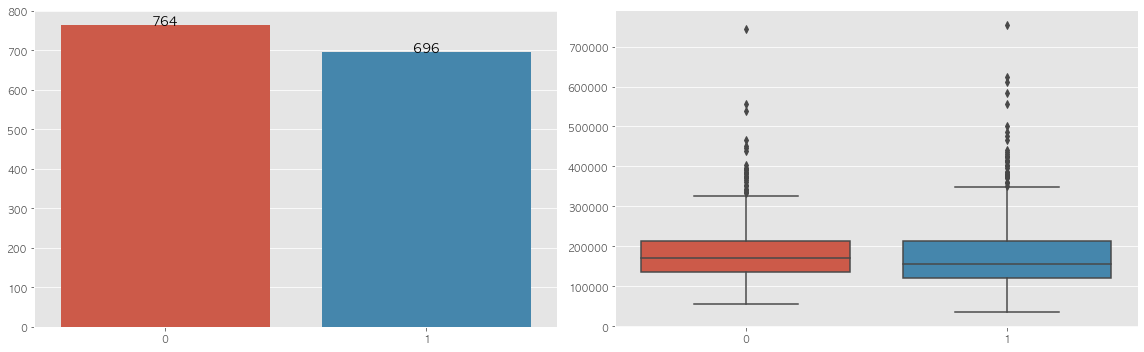

In [76]:
nor_compare_plot(x = 'Remodel', y = 'SalePrice', data = final_data)

#### 5.3.3.1. 가설검정 1

- 위의 시각화를 통해, 리모델링 여부에 따라 큰 차이를 확인할 수 없었다.


- 하지만, 일반적으로 리모델링을 하는 경우 집의 가격이 올라간다고 생각하는데 과연 그러한 결과를 나타내는지 가설검정을 통해 확인해보도록 하자.


- 가설은 아래와 같다.


> - $H_0$ : 리모델링 여부에 따라 가격의 평균 차이가 없다.<br><br>
> - $H_1$ : 리모델링 여부에 따라 가격의 평균 차이가 있다.

In [77]:
# 리모델링 여부에 따라 가격의 평균 중앙값 확인하기
remodel_1 = final_data[final_data['Remodel'] == 1]
remodel_0 = final_data[final_data['Remodel'] == 0]

print('The Mean of SalePrice Remodel = 1 :', round(remodel_1['SalePrice'].mean(), 4), '\n')
print('The Median of SalePrice Remodel = 1 :', remodel_1['SalePrice'].median(), '\n')

print('The Mean of SalePrice Remodel = 0 :', round(remodel_0['SalePrice'].mean(), 4), '\n')
print('The Median of SalePrice Remodel = 0 :', remodel_0['SalePrice'].median())

The Mean of SalePrice Remodel = 1 : 179096.3075 

The Median of SalePrice Remodel = 1 : 155000.0 

The Mean of SalePrice Remodel = 0 : 182583.6597 

The Median of SalePrice Remodel = 0 : 170000.0


In [78]:
display(pd.DataFrame(final_data[final_data['Remodel'] == 1]['SalePrice'].describe()))
display(pd.DataFrame(final_data[final_data['Remodel'] == 0]['SalePrice'].describe()))

,SalePrice
count,696.000000
mean,179096.307471
std,88383.080722
min,34900.000000
25%,121900.000000
50%,155000.000000
75%,213062.500000
max,755000.000000


,SalePrice
count,764.000000
mean,182583.659686
std,70333.800127
min,55993.000000
25%,135500.000000
50%,170000.000000
75%,214000.000000
max,745000.000000


- 리모델링을 수행한 건물보다 리모델링을 수행하지 않은 건물 가격의 평균과 중앙값이 더 높게 나타났다.


- 보다 정확한 확인을 위하여 **T-test**를 수행해주도록 하자.

In [79]:
t_test(x = 'Remodel', y = 'SalePrice', data = final_data, alpha = 0.05)

등분산 검정 결과 유의확률이 0.0002890049470259897으로 유의수준 0.05보다 작으므로 대립가설을 기각할 근거가 없다. 

statistic = 0.829 

P-value = 0.407


- 리모델링 여부에 따른 평균 가격 차이를 알아보기 위한 검정 결과, t통계량 값은 약 **0.8289**이고 유의확률은 약 **0.407** 이다.


- 즉, 유의확률 0.407이 유의수준 0.05보다 크므로 대립가설을 기각할 수 있다. 따라서, 리모델링 여부에 따른 가격의 평균 차이는 없다고 할 수 있다.

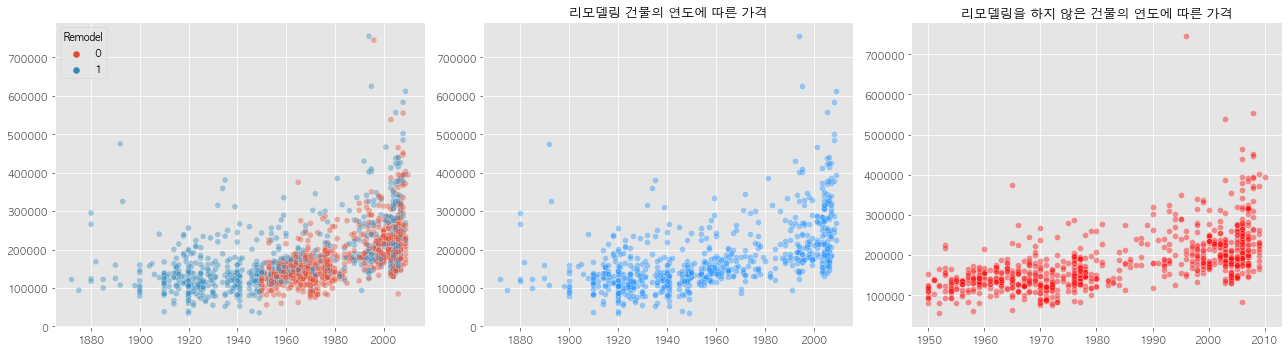

In [89]:
# 그렇다면 언제 지어진 건물들이 리모델링을 했을까?
fig, axes = plt.subplots(ncols = 3, figsize = (18, 5))

# 전체 데이터의 시각화
sns.scatterplot(x = 'YearBuilt', y = 'SalePrice', hue = 'Remodel', alpha = 0.4, data = final_data, ax = axes[0])

# 리모델링을 한 건물의 시각화
plot_data = final_data[final_data['Remodel'] == 1]
sns.scatterplot(x = 'YearBuilt', y = 'SalePrice', color = 'dodgerblue', alpha = 0.4, data = plot_data, ax = axes[1])
axes[1].set_title('리모델링 건물의 연도에 따른 가격', fontsize = 13)

# 리모델링을 하지 않은 건물의 시각화
plot_data = final_data[final_data['Remodel'] == 0]
sns.scatterplot(x = 'YearBuilt', y = 'SalePrice', color = 'red', alpha = 0.4, data = plot_data, ax = axes[2])
axes[2].set_title('리모델링을 하지 않은 건물의 연도에 따른 가격', fontsize = 13)

for num in [0, 1, 2]:
    axes[num].set_xlabel('')
    axes[num].set_ylabel('')
    
fig.tight_layout()

- 위의 시각화를 통해, **1950**년도보다 이전에 건축된 건물들은 모두 리모델링을 했음을 확인할 수 있다.


- 그렇다면, 1950년 이전에 건축된 건물과 이후에 건축된 건물의 가격에 차이가 있을까?


- 1950년 이후에 리모델링을 한 건물과 그렇지 않은 건물이 있으므로, 1950년대 이후에는 리모델링 여부에 따라 건물 가격에 차이가 있을까?

### 5.3.4. 'Year_1950' 변수 생성

In [91]:
# 1950년도 이전과 이후를 나타내기 위해 변수 생성
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

final_data['Year_1950'] = final_data['YearBuilt'].apply(lambda x: 1 if x >= 1950 else 0)
final_data['Year_1950'] = final_data['Year_1950'].astype('int64')

print('Shape of final_data *After Create* :', final_data.shape, '\n')
print('Unique values of Year_1950 :', np.sort(final_data['Year_1950'].unique()))

Shape of final_data *Before Create* : (1460, 92) 

Shape of final_data *After Create* : (1460, 93) 

Unique values of Year_1950 : [0 1]


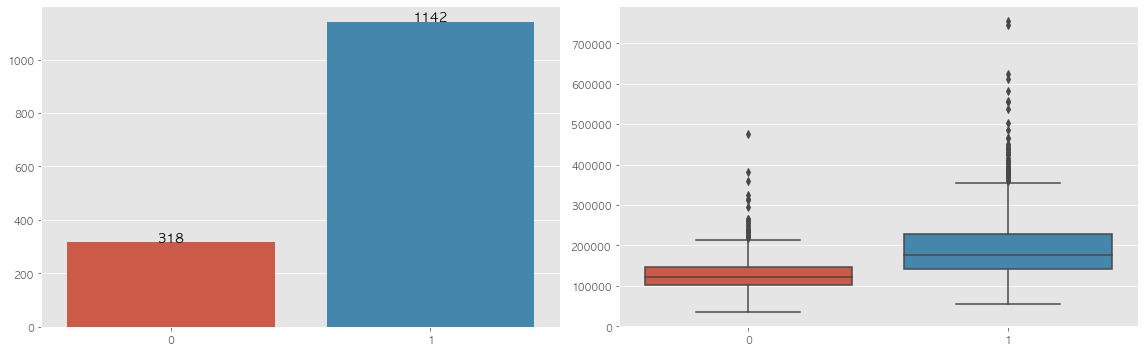

In [92]:
nor_compare_plot(x = 'Year_1950', y = 'SalePrice', data = final_data)

#### 5.3.4.1. 가설검정 2

- 위의 시각화를 통해, 1950년도 이후에 지어진 건물과 이전에 지어진 건물간의 가격에 차이가 있음을 확인할 수 있다.


- **T-test**를 통해서 좀 더 정확히 살펴보도록 하자.


> - $H_0$ : 1950년도 이후에 지어진 건물과 1950년도 이전에 지어진 건물에 따라 가격의 평균 차이가 없다.<br><br>
> - $H_1$ : 1950년도 이후에 지어진 건물과 1950년도 이전에 지어진 건물에 따라 가격의 평균 차이가 있다.

In [93]:
t_test(x = 'Year_1950', y = 'SalePrice', data = final_data, alpha = 0.05)

등분산 검정 결과 유의확률이 9.480014882005363e-08으로 유의수준 0.05보다 작으므로 대립가설을 기각할 근거가 없다. 

statistic = 16.092 

P-value = 0.0


- 검정 결과 t통계량 값은 약 **16.092**이고 유의확률은 매우 작은 값을 나타내고 있다.


- 즉, 유의확률이 매우 작아 유의수준 **0.05**보다 작으므로 대립가설을 기각할 근거가 없다. 따라서, 1950년대 이전과 이후에 따라 건물 가격의 평균 차이가 있다고 할 수 있다.

#### 5.3.4.2. 가설검정 3

- 앞의 **가설검정 1** 에서 리모델링 여부에 따라 가격의 평균 차이가 없다는 사실을 확인할 수 있었다.


- 그렇다면, 1950년도 이후에 지어진 건물들에서는 리모델링 여부에 따라 가격의 차이가 없을까?


> - $H_0$ : 1950년도 이후에 지어진 건물은 리모델링 여부에 따라 가격의 평균 차이가 없다.<br><br>
> - $H_1$ : 1950년도 이후에 지어진 건물은 리모델링 여부에 따라 가격의 평균 차이가 있다.

In [95]:
t_test(x = 'Remodel', y = 'SalePrice', data = final_data[final_data['Year_1950'] == 1], alpha = 0.05)

등분산 검정 결과 유의확률이 3.473531959403329e-05으로 유의수준 0.05보다 작으므로 대립가설을 기각할 근거가 없다. 

statistic = -6.672 

P-value = 0.0


- 1950년 이후에 건축된 건물에서의 리모델링에 따른 가격의 평균 차이를 알기 위해 T검정을 수행해주었다.


- T검정 결과, t통계량 값은 약 **-6.672**이고 유의확률은 매우 작은 값을 나타내고 있다.


- 즉, 유의확률이 매우 작아 유의수준 0.05보다 작으므로 대립가설을 기각할 근거가 없다. 따라서, 1950년 이후에 건축된 건물에서의 리모델링에 따른 가격의 평균 차이가 있다고 할 수 있다.

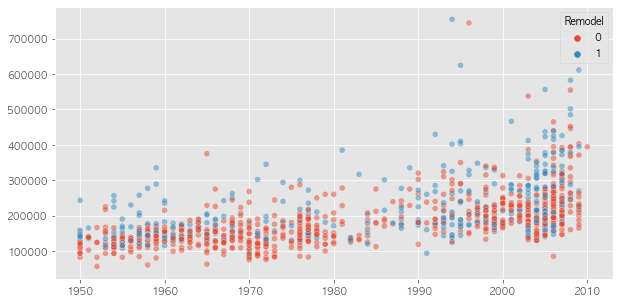

In [96]:
plt.figure(figsize = (10, 5))

sns.scatterplot(x = 'YearBuilt', y = 'SalePrice',
                hue = 'Remodel', alpha = 0.5, data = final_data[final_data['Year_1950'] == 1])
plt.xlabel('')
plt.ylabel('')
plt.show()

- 시각화를 통해 살펴보면 1950년 이후에 건축된 건물 중에서는 리모델링을 하지 않은 건물이 훨씬 많음을 볼 수 있으며, 리모델링을 한 건물이 그렇지 않은 건물보다 높은 가격에 분포해 있음을 확인할 수 있다.

### 5.3.5. 'NewBuiltRemod' 변수 생성

- 위의 두 검정 결과를 바탕으로, **YearBuilt**와 **YearRemodAdd** 변수를 사용하여 새로운 변수를 만들어주자.


- 1950년도 보다 이전에 건축된 건물이면 **1**, 1950년도 이후에 건축되고 리모델링을 수행하지 않았으면 **2**, 1950년도 이후에 건축되고 리모델링을 수행했으면 **3**을 의미하는 **NewBuiltRemod** 변수를 만들어주자.

In [97]:
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

final_data['NewBuiltRemod'] = np.nan

for index in final_data.index:
    
    year = final_data.loc[index, 'YearBuilt']
    remodel = final_data.loc[index, 'Remodel']
    
    if year < 1950:
        final_data.loc[index, 'NewBuiltRemod'] = 1
    
    elif (year >= 1950) & (remodel == 0):
        final_data.loc[index, 'NewBuiltRemod'] = 2
    
    else:
        final_data.loc[index, 'NewBuiltRemod'] = 3
        
final_data['NewBuiltRemod'] = final_data['NewBuiltRemod'].astype('int64')
        
print('Shape of final_data *After Create* :', final_data.shape, '\n')
print('Unique values of NewBuiltRemod :', np.sort(final_data['NewBuiltRemod'].unique()))

Shape of final_data *Before Create* : (1460, 93) 

Shape of final_data *After Create* : (1460, 94) 

Unique values of NewBuiltRemod : [1 2 3]


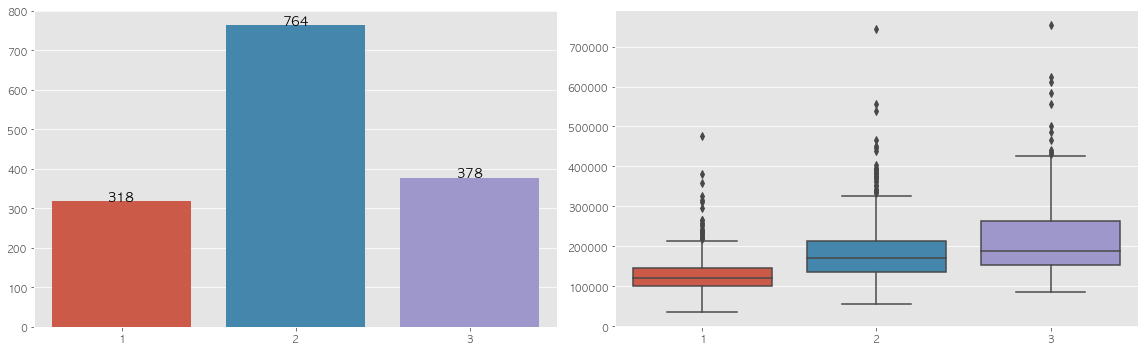

In [98]:
nor_compare_plot(x = 'NewBuiltRemod', y = 'SalePrice', data = final_data)

#### 5.3.5.1. 가설검정 4

- 시각화를 통해, 새로 생성해준 세 개의 가격 차이가 있음을 확인할 수 있다.


- 가설검정을 통해 검정 결과를 확인해보도록 하자.


> - $H_0$ : 세 집단 가격의 평균은 같다.<br><br>
> - $H_1$ : 세 집단 가격의 평균은 같지 않다.

In [99]:
# 분산분석 수행하기 위한 데이터 생성
data1, data2, data3 = [final_data[final_data['NewBuiltRemod'] == num]['SalePrice'] for num in [1, 2, 3]]

# 함수 적용
anova_test(data1, data2, data3, alpha = 0.05)

Kruskal Statistic : 285.1593 

Kruskal P-value : 0.0


- 시각화와 분산분석을 통해서 차이가 있음을 확인할 수 있으므로, **YearBuilt**와 **YearRemodAdd** 변수 대신 **NewBuiltRemod** 변수를 사용하도록 하자.

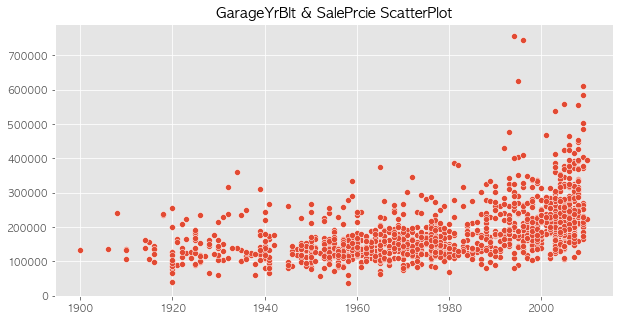

In [100]:
plt.figure(figsize = (10, 5))

# 현재 'GarageYrBlt' 변수의 9999값은 차고가 없음을 의미한다.
sns.scatterplot(x = 'GarageYrBlt', y = 'SalePrice', data = final_data[final_data['GarageYrBlt'] != 9999])
plt.title('GarageYrBlt & SalePrcie ScatterPlot')
plt.xlabel('')
plt.ylabel('')
plt.show()

- **GarageYrBlt** 변수와 **YearBuilt, YearRemodAdd** 변수간에 상관관계가 높을 것으로 판단된다.


- 차고가 없는 관측치를 제외하고 상관관계를 살펴보도록 하자.

In [101]:
# 'GarageYrBlt' & 'YearBuilt', 'YearRemodAdd'
check_data = modify_data[modify_data['GarageYrBlt'] != 9999][['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']]

# 'GarageYrBlt' & 'YearBuilt'
GB_value, GB_pval = stats.pearsonr(x = check_data['GarageYrBlt'], y = check_data['YearBuilt'])
print('Correlation cofficient between GarageYrBlt and YearBuilt :', round(GB_value, 3), '\n')
print('P-value of correlation cofficient between GarageYrBlt and YearBuilt :', GB_pval, '\n')

# 'GarageYrBlt' & 'YearRemodAdd'
GR_value, GR_pval = stats.pearsonr(x = check_data['GarageYrBlt'], y = check_data['YearRemodAdd'])
print('Correlation cofficient between GarageYrBlt and YearRemodAdd :', round(GR_value, 3), '\n')
print('P-value of correlation cofficient between GarageYrBlt and YearRemodAdd :', round(GR_pval, 3))

Correlation cofficient between GarageYrBlt and YearBuilt : 0.826 

P-value of correlation cofficient between GarageYrBlt and YearBuilt : 0.0 

Correlation cofficient between GarageYrBlt and YearRemodAdd : 0.642 

P-value of correlation cofficient between GarageYrBlt and YearRemodAdd : 0.0


- 위의 결과를 통해 **GarageYrBlt** 변수는 **YearBuilt, YearRemodAdd** 두 변수와 양의 상관관계가 있음을 확인할 수 있다.


- 세 변수를 통해서 차고가 없을 때는 **0**, 건물이 건축될 때 차고가 같이 생긴 경우 **1**, 리모델링을 하면서 차고가 생긴 경우 **2**, 그 외의 경우는 **3**을 의미하는 변수를 만들어주자.

### 5.3.6. 'GarageBuiltRemod' 변수 생성

In [103]:
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

# 'GarageYrBlt' 변수의 타입을 변경
final_data['GarageYrBlt'] = final_data['GarageYrBlt'].astype('int64')

final_data['GarageBuiltRemod'] = np.nan

for index in final_data.index:
    
    
    built = final_data.loc[index, 'YearBuilt']
    remod = final_data.loc[index, 'YearRemodAdd']
    garage = final_data.loc[index, 'GarageYrBlt']
    
    # 차고가 없는 경우
    if garage == 9999:
        final_data.loc[index, 'GarageBuiltRemod'] = 0
    
    # 건축날짜와 리모델링 날짜가 같은 경우
    elif built == remod:
        
        if built == garage:
            final_data.loc[index, 'GarageBuiltRemod'] = 1
        
        else:
            final_data.loc[index, 'GarageBuiltRemod'] = 3
    
    # 건축날짜와 리모델링 날짜가 다른 경우
    elif built != remod:
        
        # 차고가 생성된 날짜와 건축 날짜가 같다면 건물이 건축될 때 같이 생겼음을 의미한다.
        if built == garage:
            final_data.loc[index, 'GarageBuiltRemod'] = 1
        
        # 리모델링을 수행한 날짜와 같다면 리모델링을 수행할 당시 생겼다고 가정하자.
        elif remod == garage:
            final_data.loc[index, 'GarageBuiltRemod'] = 2
        
        else:
            final_data.loc[index, 'GarageBuiltRemod'] = 3
    
final_data['GarageBuiltRemod'] = final_data['GarageBuiltRemod'].astype('int64')
    
print('Shape of final_data *After Create* :', final_data.shape, '\n')
print('Unique values of GarageBuiltRemod :', np.sort(final_data['GarageBuiltRemod'].unique()))

Shape of final_data *Before Create* : (1460, 94) 

Shape of final_data *After Create* : (1460, 95) 

Unique values of GarageBuiltRemod : [0 1 2 3]


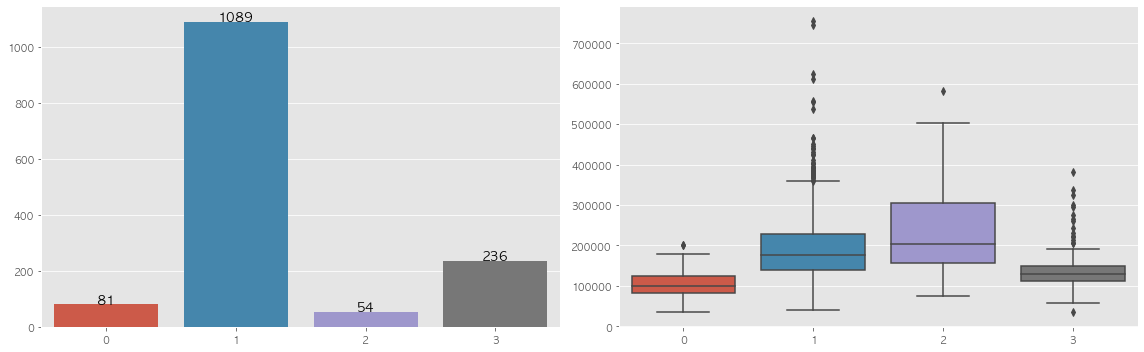

In [104]:
nor_compare_plot(x = 'GarageBuiltRemod', y = 'SalePrice', data = final_data)

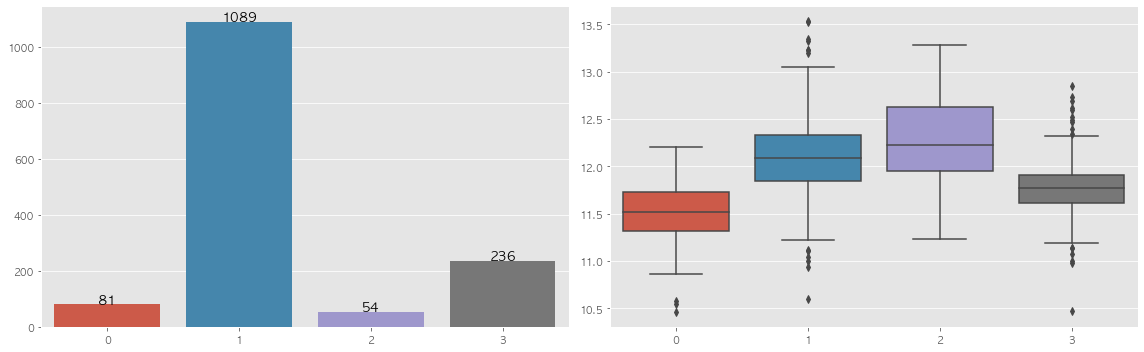

In [105]:
nor_compare_plot(x = 'GarageBuiltRemod', y = 'LogSalePrice', data = final_data)

In [106]:
# 분산분석을 수행하기 위한 데이터 생성
data1, data2, data3, data4 = [final_data[final_data['GarageBuiltRemod'] == num]['SalePrice'] for num in range(4)]

# 함수 적용
anova_test(data1, data2, data3, data4, alpha = 0.05)

Kruskal Statistic : 310.6121 

Kruskal P-value : 0.0


- 건물이 건축될 당시 차고지도 같이 생긴 경우가 많음을 확인 할 수 있다.


- 또한, 새로 만들어준 각 범주에 따라 차이가 있음을 확인할 수 있으며, 리모델링 수행 당시 차고지도 생긴 경우 가격의 평균이 제일 높음을 확인할 수 있다.

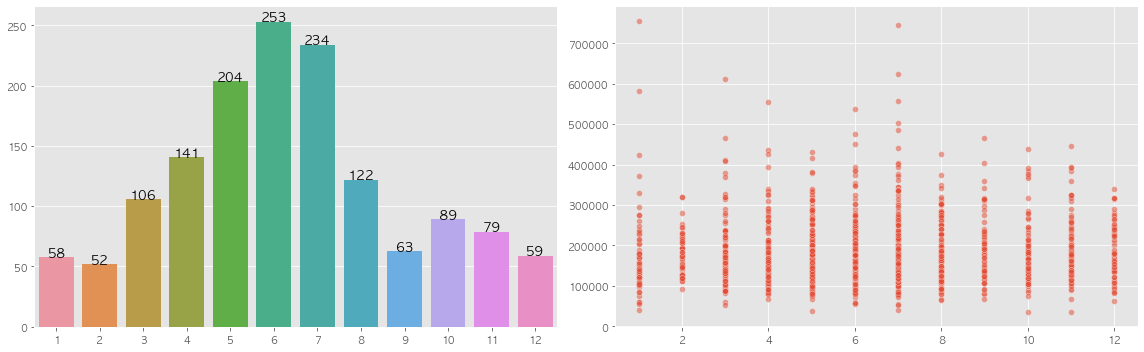

In [107]:
or_compare_plot(x = 'MoSold', y = 'SalePrice', data = final_data)

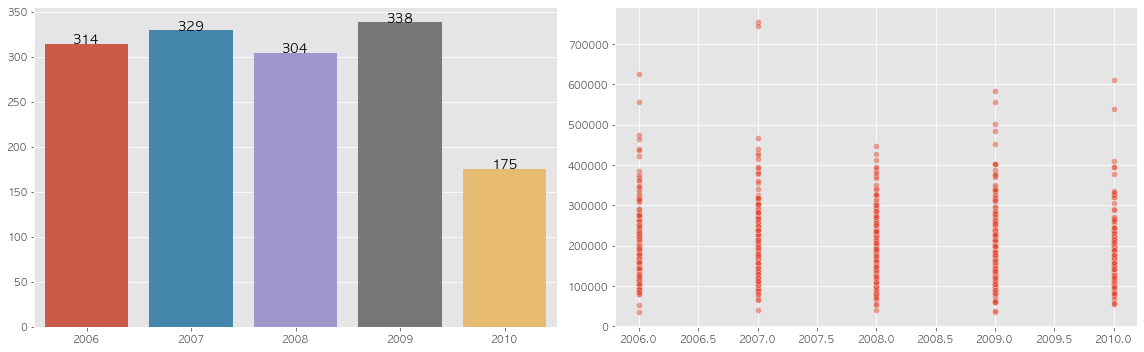

In [108]:
or_compare_plot(x = 'YrSold', y = 'SalePrice', data = final_data)

- 건물이 판매된 연도와 월에 따라서 가격의 분포를 살펴보았을 때, 가격에 큰 영향을 주지 않는 것으로 판단된다.


- 현재 데이터는 연도와 월이 분리되어 있기 때문에 하나로 합쳐 다시 살펴보도록 하자.

### 5.3.7. 'YearMonth' 변수 생성

In [111]:
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

final_data['YearMonth'] = np.nan

for index in final_data.index:
    
    year = str(final_data.loc[index, 'YrSold'])
    month = str(final_data.loc[index, 'MoSold'])
    
    final_data.loc[index, 'YearMonth'] = year + '-' + month
    
# 날짜형으로 변환
final_data['YearMonth'] = pd.to_datetime(final_data['YearMonth'])

print('Shape of final_data *After Create* :', final_data.shape, '\n')
print('Null values of YearMonth :', final_data['YearMonth'].isnull().sum())

Shape of final_data *Before Create* : (1460, 95) 

Shape of final_data *After Create* : (1460, 96) 

Null values of YearMonth : 0


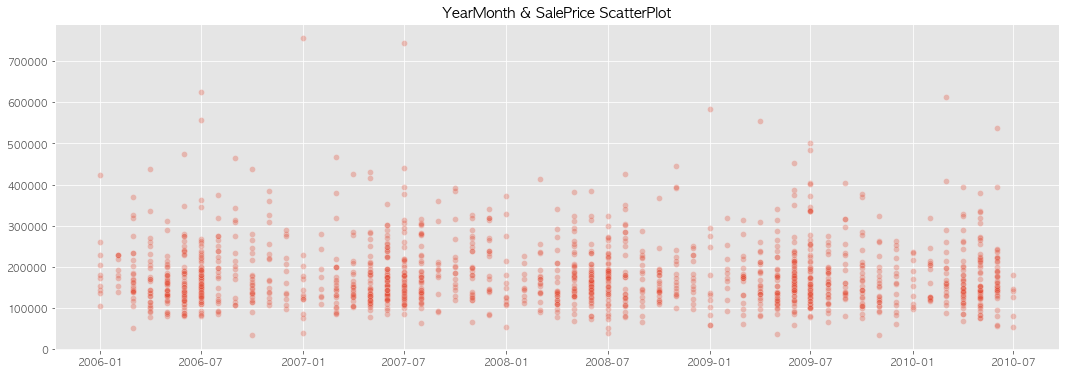

In [113]:
plt.figure(figsize = (18, 6))

sns.scatterplot(x = 'YearMonth', y = 'SalePrice', alpha = 0.3, data = final_data)
plt.title('YearMonth & SalePrice ScatterPlot')
plt.xlabel('')
plt.ylabel('')
plt.show()

- 현재 데이터의 건물들은 2006년부터 2010년까지 판매되었음을 확인할 수 있으며, 4년동안 가격이 큰 변동이 없음을 확인할 수 있다.